# **Linear Mixed Models:**

In [240]:
import os
os.environ["R_HOME"] = r"C:\Program Files\R\R-4.5.0"  

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

import seaborn as sns
import numpy as np
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import IntVector


pandas2ri.activate()


base = importr('base')
depmixS4 = importr("depmixS4")
r('set.seed(2030)')
np.random.seed(2030)

from pymer4.models import Lmer

In [241]:
import os
os.environ["PYTHONIOENCODING"] = "utf-8"
os.environ["LC_ALL"] = "en_US.UTF-8"
os.environ["LANG"] = "en_US.UTF-8"


In [242]:
r('options(encoding = "UTF-8")')
r('Sys.setlocale("LC_ALL", "en_US.UTF-8")')


array(['LC_COLLATE=en_US.UTF-8;LC_CTYPE=en_US.UTF-8;LC_MONETARY=en_US.UTF-8;LC_NUMERIC=C;LC_TIME=en_US.UTF-8'],
      dtype='<U100')

_______

### **Elastic Net Analysis (Ridge & Lasso)**

In [243]:
import pandas as pd

# Cargar el archivo CSV
lmm_data = pd.read_csv("../data/processed/lmm_data.csv", delimiter=",")  # Asegurando la lectura con la coma como separador

# Lista de columnas que tienen valores con comas en los decimales
columns_to_fix = [
    "Employment_Conditions",
    "Business_Climate",
    "Socio-cultural_Factors",
    "Connectivity_and_Mobility",
    "Health_and_Ecology",
    "Housing_and_Urban_Space",
    "Urban_Quality_of_Life_Index_2019"
]

# Reemplazar comas por puntos y convertir a tipo float
for col in columns_to_fix:
    lmm_data[col] = lmm_data[col].str.replace(",", ".").astype(float)

# Ahora ya puedes continuar con el preprocesamiento

In [244]:

print(lmm_data.columns)

Index(['Commune', 'Original_Day', 'Correlative_Day', 'Transition',
       'Probability_Transition', 'Days', 'Internal_Mobility_Index',
       'External_Mobility_Index', 'Cumulative_Cases_Rate', 'Gross_Daily_Cases',
       'Gross_Daily_Cases_Mobile_Average_7_Days', 'Per_Capita_Income',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Higher_Education_Percentage',
       'Social_Priority_Index_2020', 'Employment_Conditions',
       'Business_Climate', 'Socio-cultural_Factors',
       'Connectivity_and_Mobility', 'Health_and_Ecology',
       'Housing_and_Urban_Space', 'Urban_Quality_of_Life_Index_2019'],
      dtype='object')


Probando las 6 dimensiones del ICVU 2019:

Elastic Net RMSE: 23.967427068639978

Coefficients:
                    Variable  Elastic Net Coef
0      Employment_Conditions         -2.262442
1           Business_Climate         -0.099123
2     Socio-cultural_Factors         -0.003049
3  Connectivity_and_Mobility         -0.390714
4         Health_and_Ecology          0.930420
5    Housing_and_Urban_Space         -2.483452


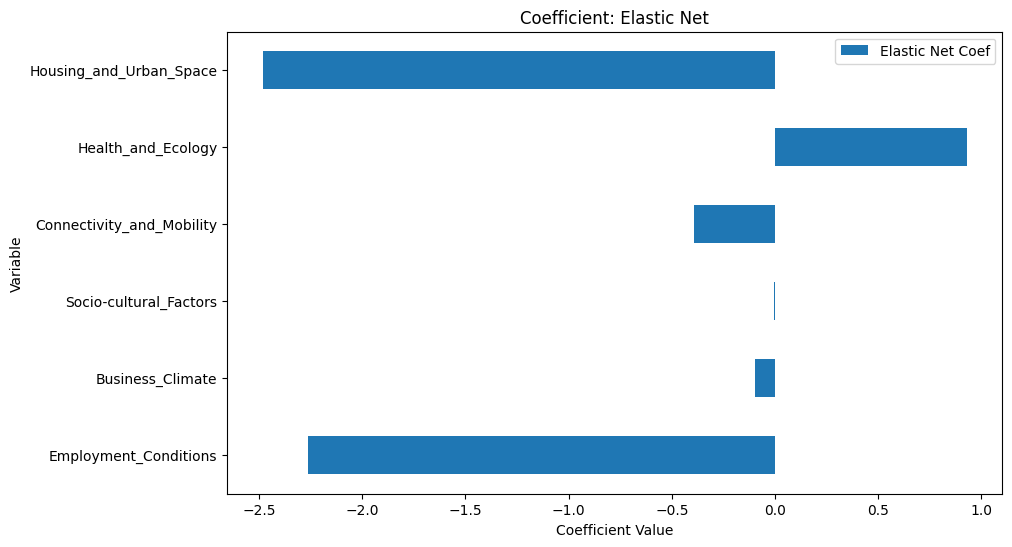

In [245]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define las columnas de covariables y la variable objetivo
covariables = ['Employment_Conditions','Business_Climate', 'Socio-cultural_Factors',
       'Connectivity_and_Mobility', 'Health_and_Ecology',
       'Housing_and_Urban_Space']
target = 'Gross_Daily_Cases_Mobile_Average_7_Days'  # Sustituye por tu variable objetivo

# Dividir los datos en características (X) y objetivo (y)
X = lmm_data[covariables]
y = lmm_data[target]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ajustar modelo Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # Ajusta alpha y l1_ratio según sea necesario
elastic_net.fit(X_train, y_train)

# Coeficientes obtenidos
elastic_net_coef = elastic_net.coef_

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({
    'Variable': covariables,
    'Elastic Net Coef': elastic_net_coef
})

# Evaluar el modelo
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_rmse = np.sqrt(mean_squared_error(y_test, elastic_net_pred))

# Mostrar resultados
print("Elastic Net RMSE:", elastic_net_rmse)
print("\nCoefficients:")
print(coef_df)

# Visualización opcional
import matplotlib.pyplot as plt

coef_df.set_index('Variable').plot(kind='barh', figsize=(10, 6))
plt.title('Coefficient: Elastic Net')
plt.xlabel('Coefficient Value')
plt.grid(False)
plt.show()


Socio-demographic Variables (Censo 2017):

Elastic Net RMSE: 24.01930668908374

Coefficients:
                       Variable  Elastic Net Coef
0             Per_Capita_Income         -0.542138
1     Average_Household_Persons         -0.247706
2                    Inmigrants         -0.218160
3       Total_Households_Housed         -0.763682
4  Housing_Precariousness_Index          1.155550
5   Higher_Education_Percentage         -3.534679


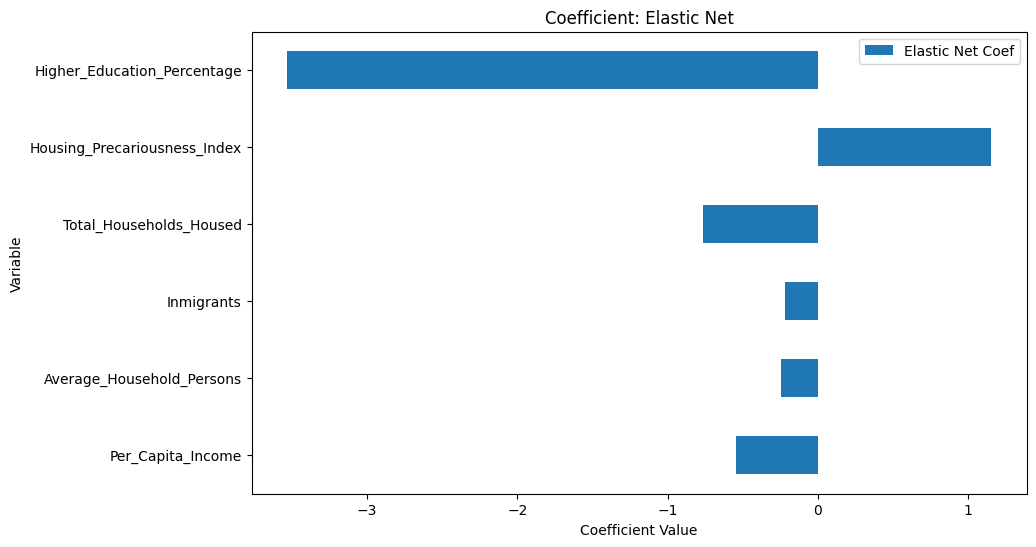

In [246]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define las columnas de covariables y la variable objetivo
covariables = ['Per_Capita_Income', 'Average_Household_Persons',
               'Inmigrants', 'Total_Households_Housed', 'Housing_Precariousness_Index',
               'Higher_Education_Percentage']
target = 'Gross_Daily_Cases_Mobile_Average_7_Days'  # Sustituye por tu variable objetivo

# Dividir los datos en características (X) y objetivo (y)
X = lmm_data[covariables]
y = lmm_data[target]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ajustar modelo Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # Ajusta alpha y l1_ratio según sea necesario
elastic_net.fit(X_train, y_train)

# Coeficientes obtenidos
elastic_net_coef = elastic_net.coef_

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({
    'Variable': covariables,
    'Elastic Net Coef': elastic_net_coef
})

# Evaluar el modelo
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_rmse = np.sqrt(mean_squared_error(y_test, elastic_net_pred))

# Mostrar resultados
print("Elastic Net RMSE:", elastic_net_rmse)
print("\nCoefficients:")
print(coef_df)

# Visualización opcional
import matplotlib.pyplot as plt

coef_df.set_index('Variable').plot(kind='barh', figsize=(10, 6))
plt.title('Coefficient: Elastic Net')
plt.xlabel('Coefficient Value')
plt.grid(False)
plt.show()


___________

# **Linear Mixed Models - Transitions**

## **Transition 1->2** (Moderate to Severe):

In [247]:
specific_transition_1_2 = 'Trans_1->2'
transition_data_1_2 = lmm_data[lmm_data['Transition'] == specific_transition_1_2]


In [248]:
transition_data_1_2['Commune'] = transition_data_1_2['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_3640\1635946703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_1_2['Commune'] = transition_data_1_2['Commune'].astype('category')


In [249]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_1_2)
r.assign("transition_data_1_2", r_data)

Commune,Original_Day,Correlative_Day,...,Health_and_Ecology,Housing_and_Urban_Space,Urban_Quality_of_Life_Index_2019
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


### **Model A**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index

Formula: 

$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + (\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} \mid \text{Commune})
$$

In [250]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_A_trans_1_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_1_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_A_trans_1_2))
writeLines(summary_text)
''')


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12292.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6575 -0.5798 -0.0798  0.4670  5.5393 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.101357 0.31837             
          Internal_Mobility_Index 0.007213 0.08493  -0.46      
          External_Mobility_Index 0.006732 0.08205  -0.44 -0.45
 Residual                         0.010097 0.10049             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)             -0.56914    0.05507 32.89691 -10.335 7.30e-12 ***
Internal_Mobility_Index  0.

#### R2 Marginal and Conditional:

In [251]:

r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_A_trans_1_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')


r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.251618,0.942271


#### Random Effects:

In [252]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_A_trans_1_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,0.172851,0.022602,-0.044716,Cerrillos
Cerro Navia,0.427945,-0.054062,-0.061213,Cerro Navia
Conchali,0.251372,-0.027316,-0.030421,Conchali
El Bosque,0.087040,-0.017365,0.030611,El Bosque
Estacion Central,-0.474498,0.109837,0.029388,Estacion Central


##### Random Effect of Commune - External Mobility Index.

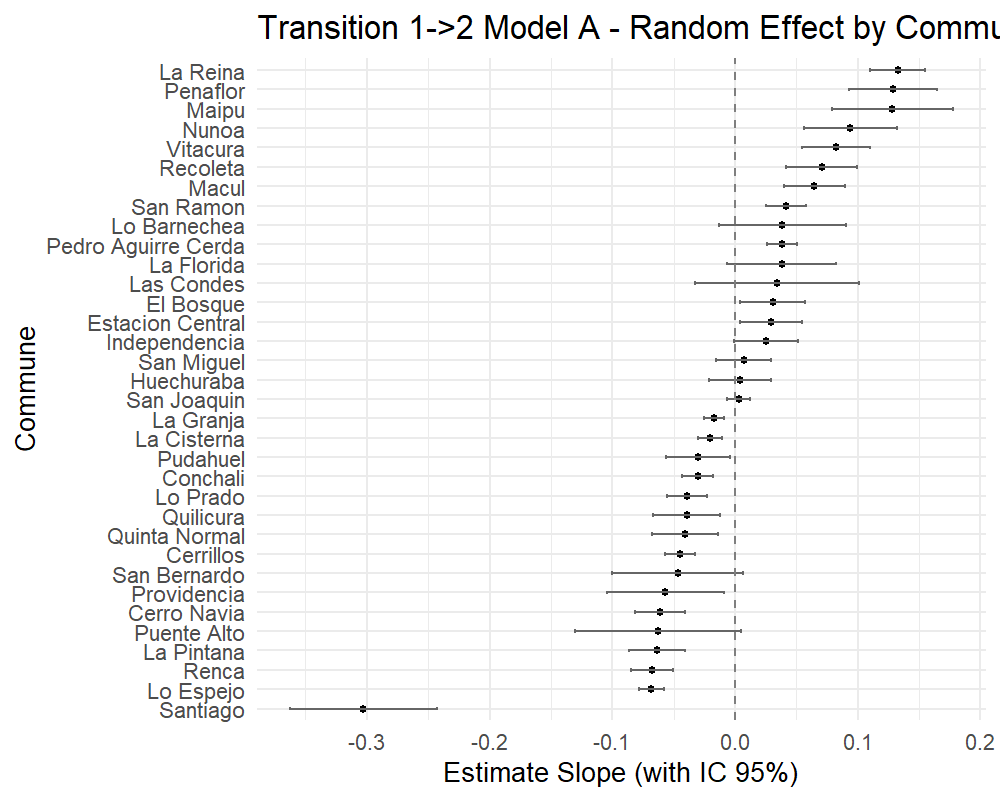

In [253]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_1_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 1->2 Model A - Random Effect by Commune / External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_1_2_modelA_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_1_2_modelA_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

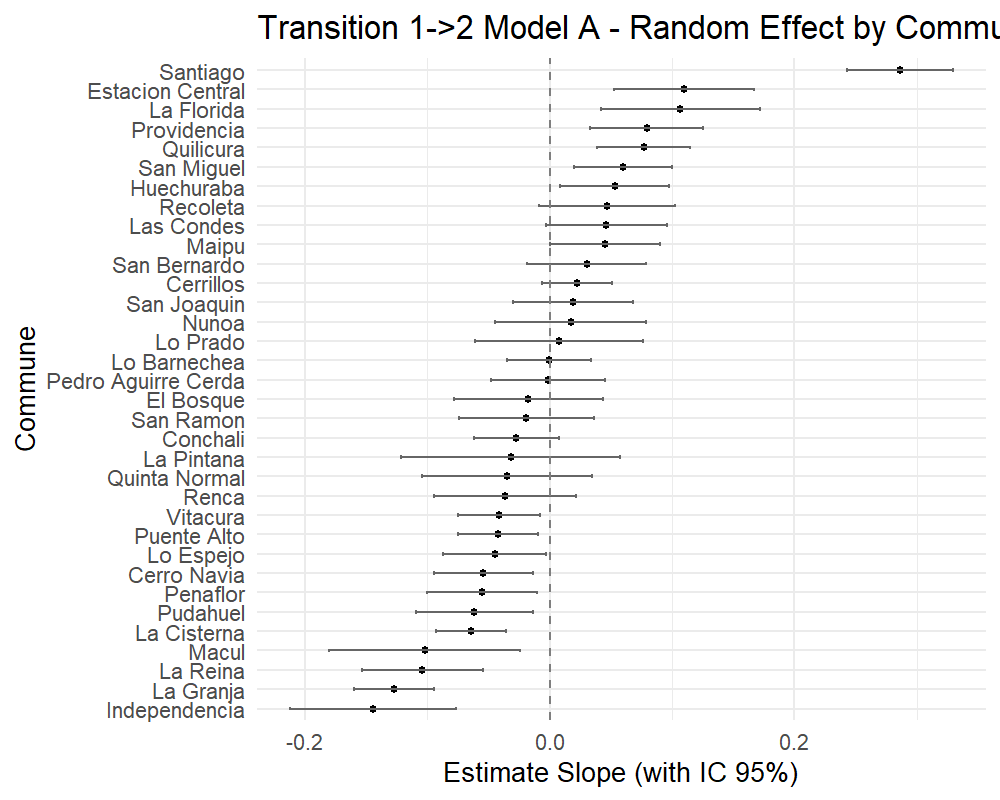

In [254]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_1_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 1->2 Model A - Random Effect by Commune / Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_1_2_modelA_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_1_2_modelA_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### **Model B**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index
- Sociodemographic Variables Censo 2017.


$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + \text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage} +(\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} +\text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage}\mid \text{Commune})
$$

In [255]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_1_2) <- gsub("-", "_", colnames(transition_data_1_2))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Per_Capita_Income','Total_Households_Housed', 'Housing_Precariousness_Index',
                        'Higher_Education_Percentage')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_1_2[[var]] <- as.numeric(gsub(",", ".", transition_data_1_2[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_1_2[vars_to_scale] <- scale(transition_data_1_2[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_B_trans_1_2 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + 
      (Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune),
      data = transition_data_1_2, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_B_trans_1_2))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12349.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7095 -0.5766 -0.0831  0.4644  5.5174 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.018367 0.13553                   
          Internal_Mobility_Index      0.031432 0.17729   0.62            
          External_Mobility_Index      0.033955 0.18427   0.36 -0.49      
          Per_Ca

In [256]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_B_trans_1_2)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.247228,0.927199


In [257]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_B_trans_1_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Per_Capita_Income,Total_Households_Housed,Housing_Precariousness_Index,Higher_Education_Percentage,Commune
Cerrillos,-0.046000,0.051791,-0.100074,0.186341,-0.090180,-0.017286,-0.238431,Cerrillos
Cerro Navia,-0.176916,-0.107799,-0.135355,-0.262480,-0.072773,-0.026259,0.110242,Cerro Navia
Conchali,-0.078896,-0.039714,-0.069271,-0.101694,-0.040806,-0.010421,0.030434,Conchali
El Bosque,0.064219,-0.041600,0.067853,-0.412828,0.078736,0.072991,0.435079,El Bosque
Estacion Central,0.173107,0.203279,0.073516,0.678699,-0.007441,-0.010316,-0.525034,Estacion Central


##### Random Effect of Commune - External Mobility Index.

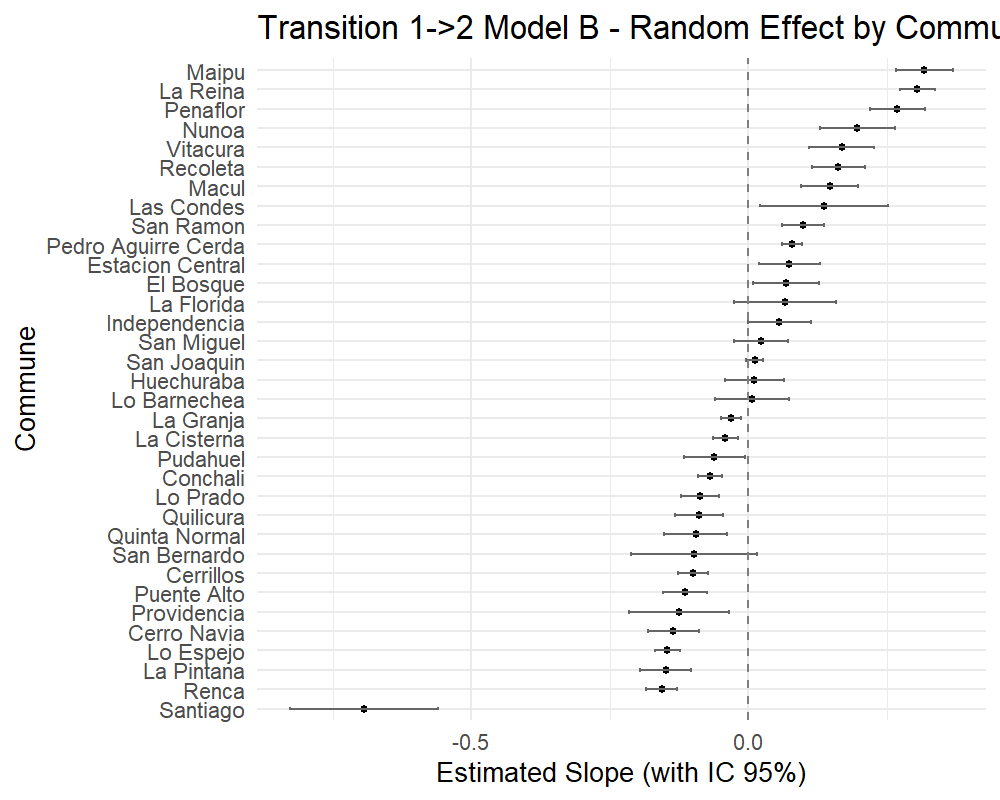

In [258]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_1_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 1->2 Model B - Random Effect by Commune / External Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_1_2_modelB_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_1_2_modelB_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

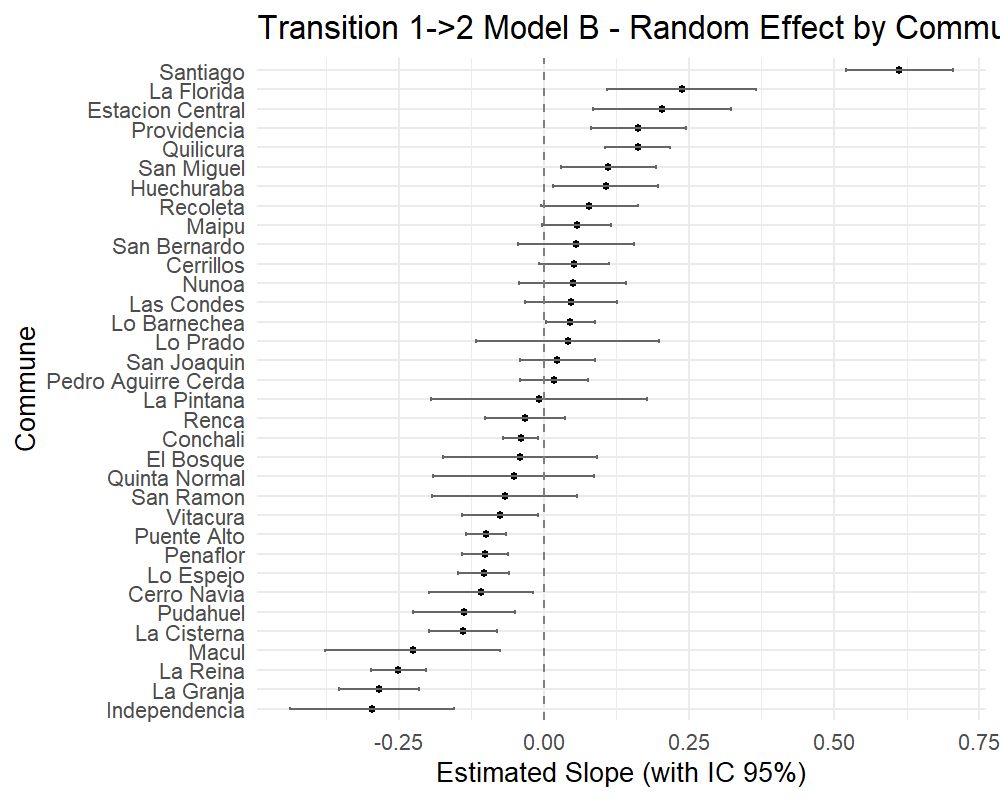

In [259]:
# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_1_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 1->2 Model B - Random Effect by Commune / Internal Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_1_2_modelB_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_1_2_modelB_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### Modelo C Mobility + 5 dimentions of Urban Quality of Life Index 2019: 
- Internal Mobility Index
- External Mobility Index
- Employment Conditions
- Business Climate
- Socio-cultural Factors
- Connectivity and Mobility
- Health and Ecology
- Housing and Urban Space

In [260]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_1_2) <- gsub("-", "_", colnames(transition_data_1_2))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Employment_Conditions','Business_Climate', 'Socio_cultural_Factors',
                        'Connectivity_and_Mobility', 'Health_and_Ecology',
                        'Housing_and_Urban_Space')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_1_2[[var]] <- as.numeric(gsub(",", ".", transition_data_1_2[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_1_2[vars_to_scale] <- scale(transition_data_1_2[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_C_trans_1_2 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space + 
      (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space | Commune),
      data = transition_data_1_2, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_C_trans_1_2))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Employment_Conditions + Business_Climate + Socio_cultural_Factors +  
    Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space +  
    (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +  
        Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility +  
        Health_and_Ecology + Housing_and_Urban_Space | Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12348.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7063 -0.5705 -0.0893  0.4631  5.5059 

Random effects:
 Groups   Name                      Variance  Std.Dev. Corr                   
 Commune  (Intercept)               0.0098536 0.09927                         
          Internal_Mobility_Index   0.0324901 0.18025   0.06                 

In [261]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_C_trans_1_2)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.37958,0.901131


#### Random Effects:

In [262]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_C_trans_1_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Employment_Conditions,Business_Climate,Socio_cultural_Factors,Connectivity_and_Mobility,Health_and_Ecology,Housing_and_Urban_Space,Commune
Cerrillos,-0.037732,0.049780,-0.097583,-0.092664,0.068061,0.010987,0.034866,0.034184,-0.028869,Cerrillos
Cerro Navia,-0.112134,-0.103485,-0.134896,-0.068016,0.107514,0.022982,0.033490,0.069336,0.043298,Cerro Navia
Conchali,-0.053673,-0.048724,-0.067342,-0.035571,0.055108,0.011858,0.016358,0.033633,0.018983,Conchali
El Bosque,0.022918,-0.063648,0.081046,0.085041,-0.055638,-0.008380,-0.030549,-0.025224,0.035367,El Bosque
Estacion Central,0.044761,0.254846,0.050011,-0.016982,-0.150267,-0.047408,0.040440,-0.019495,-0.052381,Estacion Central


##### Random Effect of Commune - External Mobility Index.

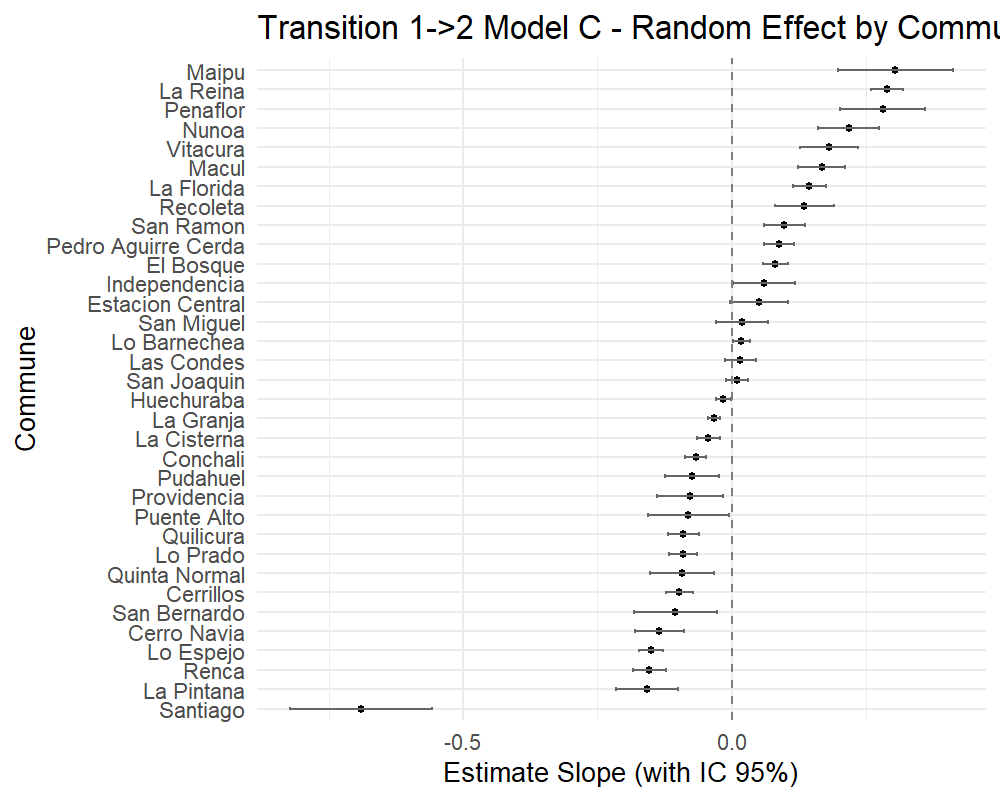

In [263]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_1_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 1->2 Model C - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_1_2_modelC_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_1_2_modelC_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

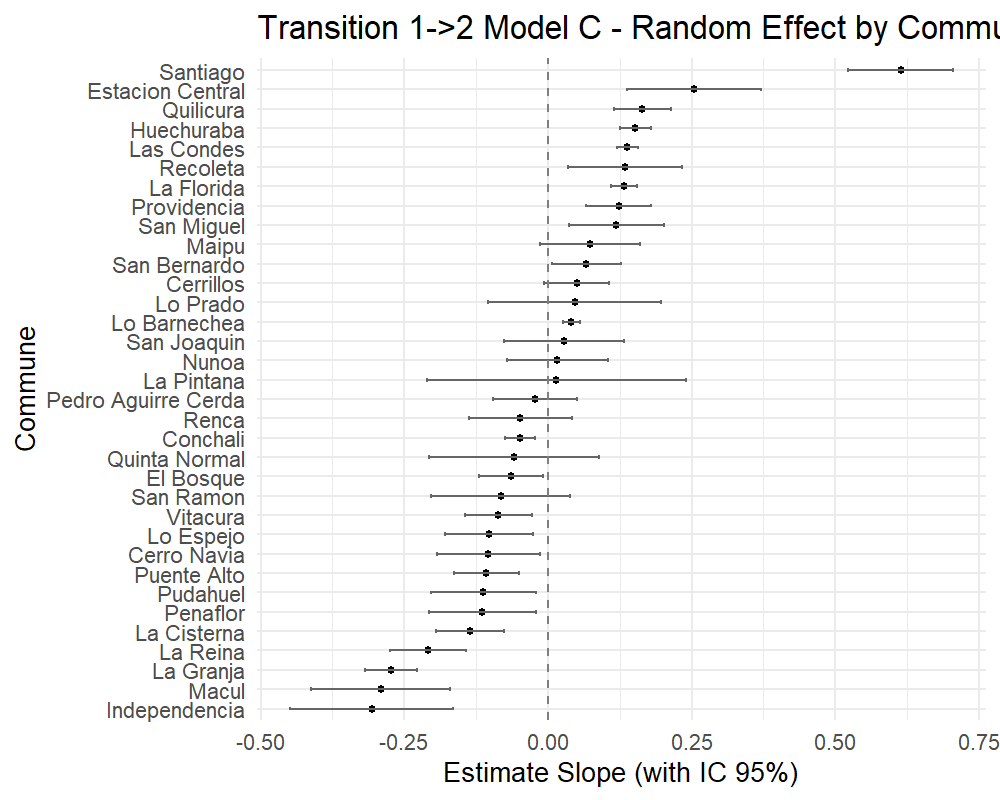

In [264]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_1_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 1->2 Model C - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_1_2_modelC_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_1_2_modelC_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

## **Transition 2->2** (Persistence in Severe State):

In [265]:
specific_transition_2_2 = 'Trans_2->2'
transition_data_2_2 = lmm_data[lmm_data['Transition'] == specific_transition_2_2]


In [266]:
transition_data_2_2['Commune'] = transition_data_2_2['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_3640\1968636204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_2_2['Commune'] = transition_data_2_2['Commune'].astype('category')


In [267]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_2_2)
r.assign("transition_data_2_2", r_data)

Commune,Original_Day,Correlative_Day,...,Health_and_Ecology,Housing_and_Urban_Space,Urban_Quality_of_Life_Index_2019
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


### **Model A**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index

Formula: 

$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + (\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} \mid \text{Commune})
$$

In [268]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_A_trans_2_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_2_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_A_trans_2_2))
writeLines(summary_text)
''')


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_2_2
Control: control

REML criterion at convergence: -9464.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8732 -0.4327  0.1730  0.6021  2.2112 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.120532 0.34718             
          Internal_Mobility_Index 0.011640 0.10789  -0.51      
          External_Mobility_Index 0.009886 0.09943  -0.32 -0.53
 Residual                         0.014912 0.12212             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              1.41693    0.06017 32.89613  23.548  < 2e-16 ***
Internal_Mobility_Index -0.0

#### R2 Marginal and Conditional:

In [269]:

r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_A_trans_2_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')


r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.122286,0.933878


#### Random Effects:

In [270]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_A_trans_2_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,-0.427122,-0.026526,0.070038,Cerrillos
Cerro Navia,-0.365804,0.046023,0.054990,Cerro Navia
Conchali,-0.238381,0.024512,0.028082,Conchali
El Bosque,-0.052690,0.024503,-0.031332,El Bosque
Estacion Central,0.530476,-0.125571,-0.033496,Estacion Central


##### Random Effect of Commune - External Mobility Index.

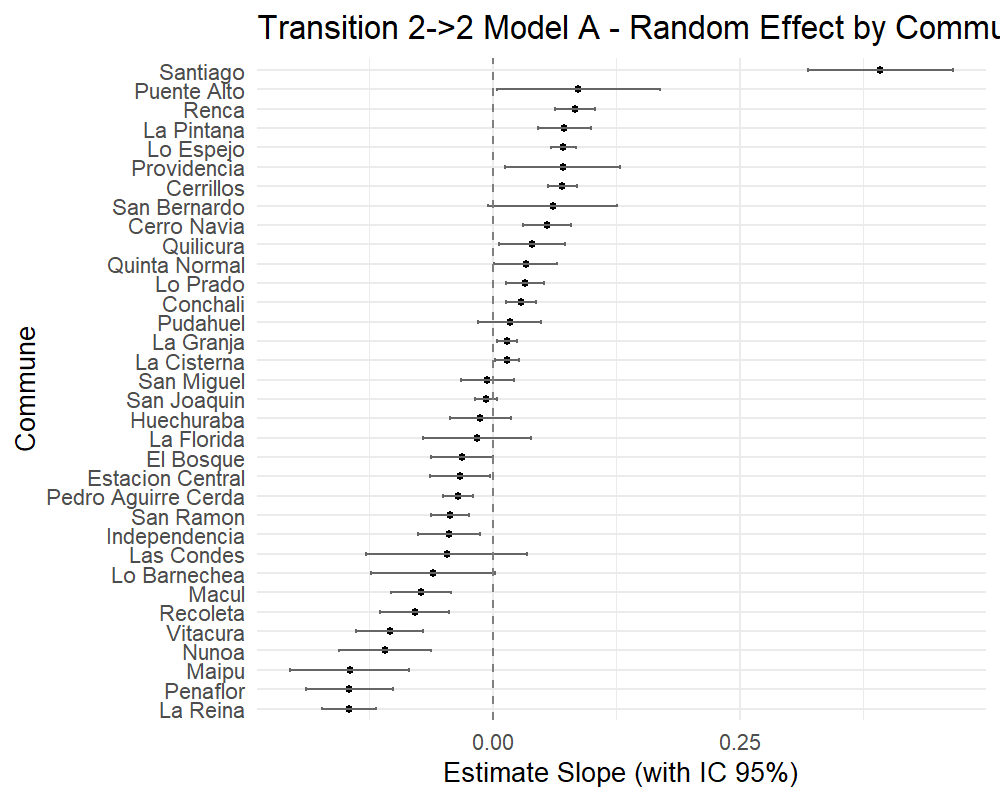

In [271]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_2_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->2 Model A - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_2_modelA_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_2_modelA_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

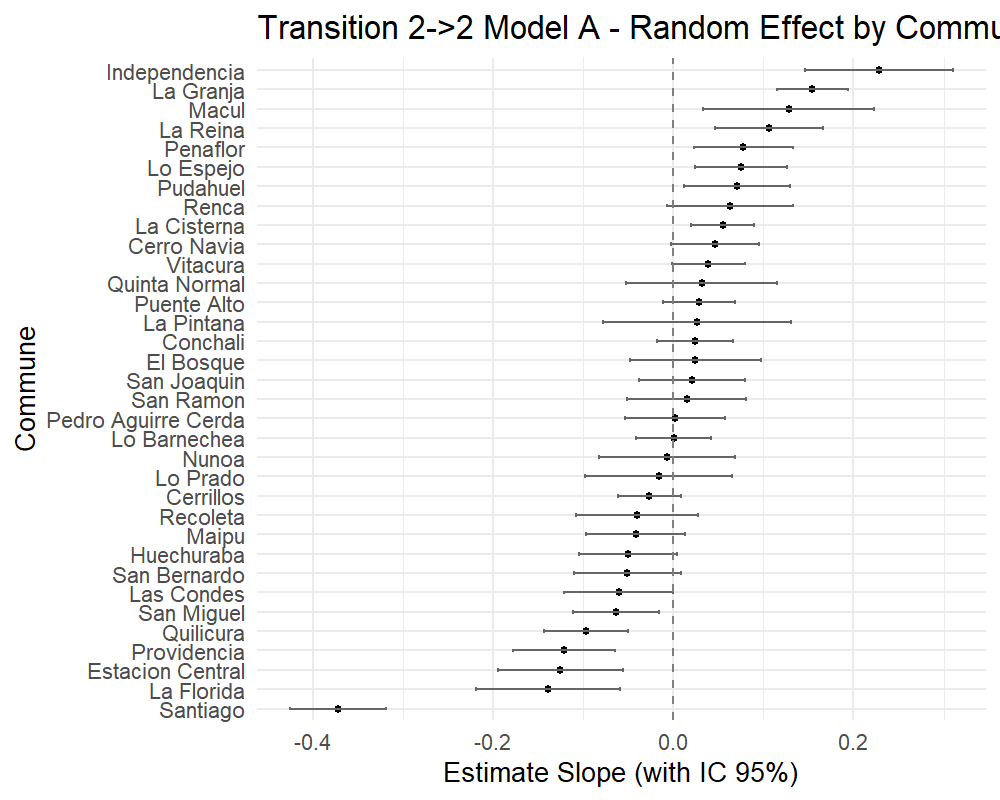

In [272]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_2_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->2 Model A - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_2_modelA_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_2_modelA_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### **Model B**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index
- Sociodemographic Variables Censo 2017.


$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + \text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage} +(\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} +\text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage}\mid \text{Commune})
$$

In [273]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_2_2) <- gsub("-", "_", colnames(transition_data_2_2))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Per_Capita_Income','Total_Households_Housed', 'Housing_Precariousness_Index',
                        'Higher_Education_Percentage')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_2_2[[var]] <- as.numeric(gsub(",", ".", transition_data_2_2[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_2_2[vars_to_scale] <- scale(transition_data_2_2[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_B_trans_2_2 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + 
      (Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune),
      data = transition_data_2_2, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_B_trans_2_2))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_2_2
Control: control

REML criterion at convergence: -9519.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8577 -0.4293  0.1763  0.6058  2.2168 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.012598 0.11224                   
          Internal_Mobility_Index      0.050708 0.22518   0.47            
          External_Mobility_Index      0.048203 0.21955   0.31 -0.57      
          Per_Cap

In [274]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_B_trans_2_2)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.190347,0.874347


In [275]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_B_trans_2_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Per_Capita_Income,Total_Households_Housed,Housing_Precariousness_Index,Higher_Education_Percentage,Commune
Cerrillos,-0.023139,-0.060488,0.154112,0.147824,0.140065,-0.053770,-0.090917,Cerrillos
Cerro Navia,0.136378,0.072063,0.136399,0.114645,0.107462,0.054040,0.036272,Cerro Navia
Conchali,0.048795,0.047105,0.061378,0.088715,0.047707,0.014777,-0.041739,Conchali
El Bosque,-0.075864,0.088684,-0.079955,0.117213,-0.073596,-0.036224,-0.269481,El Bosque
Estacion Central,-0.078843,-0.233527,-0.083311,-0.350041,-0.050717,-0.019247,0.361173,Estacion Central


##### Random Effect of Commune - External Mobility Index.

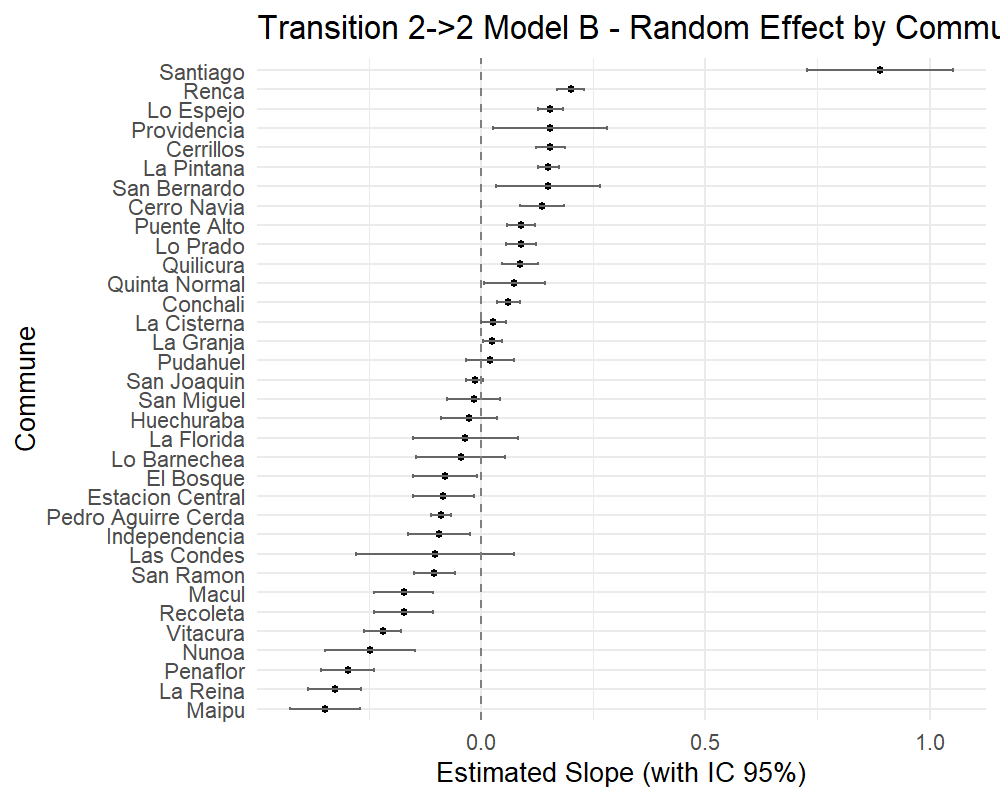

In [276]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_2_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->2 Model B - Random Effect by Commune – External Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_2_modelB_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_2_modelB_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

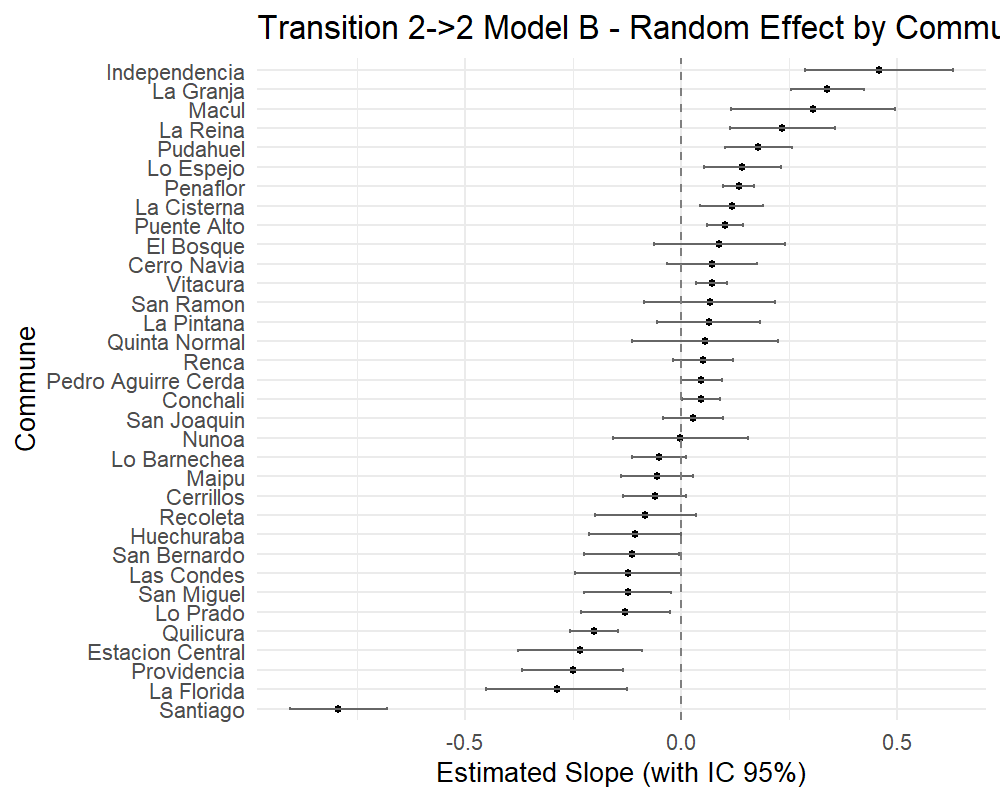

In [277]:
# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_2_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->2 Model B - Random Effect by Commune – Internal Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_2_modelB_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_2_modelB_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### Modelo C Mobility + 5 dimentions of Urban Quality of Life Index 2019: 
- Internal Mobility Index
- External Mobility Index
- Employment Conditions
- Business Climate
- Socio-cultural Factors
- Connectivity and Mobility
- Health and Ecology
- Housing and Urban Space

In [278]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_2_2) <- gsub("-", "_", colnames(transition_data_2_2))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Employment_Conditions','Business_Climate', 'Socio_cultural_Factors',
                        'Connectivity_and_Mobility', 'Health_and_Ecology',
                        'Housing_and_Urban_Space')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_2_2[[var]] <- as.numeric(gsub(",", ".", transition_data_2_2[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_2_2[vars_to_scale] <- scale(transition_data_2_2[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_C_trans_2_2 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space + 
      (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space | Commune),
      data = transition_data_2_2, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_C_trans_2_2))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Employment_Conditions + Business_Climate + Socio_cultural_Factors +  
    Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space +  
    (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +  
        Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility +  
        Health_and_Ecology + Housing_and_Urban_Space | Commune)
   Data: transition_data_2_2
Control: control

REML criterion at convergence: -9517.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8478 -0.4263  0.1756  0.5962  2.2685 

Random effects:
 Groups   Name                      Variance Std.Dev. Corr                   
 Commune  (Intercept)               0.003007 0.05483                         
          Internal_Mobility_Index   0.051866 0.22774   0.02                  
  

In [279]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_C_trans_2_2)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.233136,0.84995


#### Random Effects:

In [280]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_C_trans_2_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Employment_Conditions,Business_Climate,Socio_cultural_Factors,Connectivity_and_Mobility,Health_and_Ecology,Housing_and_Urban_Space,Commune
Cerrillos,0.020167,-0.052173,0.150299,0.051563,-0.084590,-0.060013,0.069994,-0.127758,0.105627,Cerrillos
Cerro Navia,0.051585,0.090466,0.118295,-0.002444,-0.087886,-0.014674,0.026174,-0.067120,0.029326,Cerro Navia
Conchali,0.035265,0.036209,0.062593,0.013313,-0.061647,0.030202,-0.034670,-0.005421,0.015830,Conchali
El Bosque,-0.017684,0.057241,-0.070761,-0.051502,0.060628,-0.026250,0.038132,0.017805,-0.056269,El Bosque
Estacion Central,-0.058043,-0.279291,-0.064160,0.108085,0.035339,0.069995,-0.112420,0.074200,0.065295,Estacion Central


##### Random Effect of Commune - External Mobility Index.

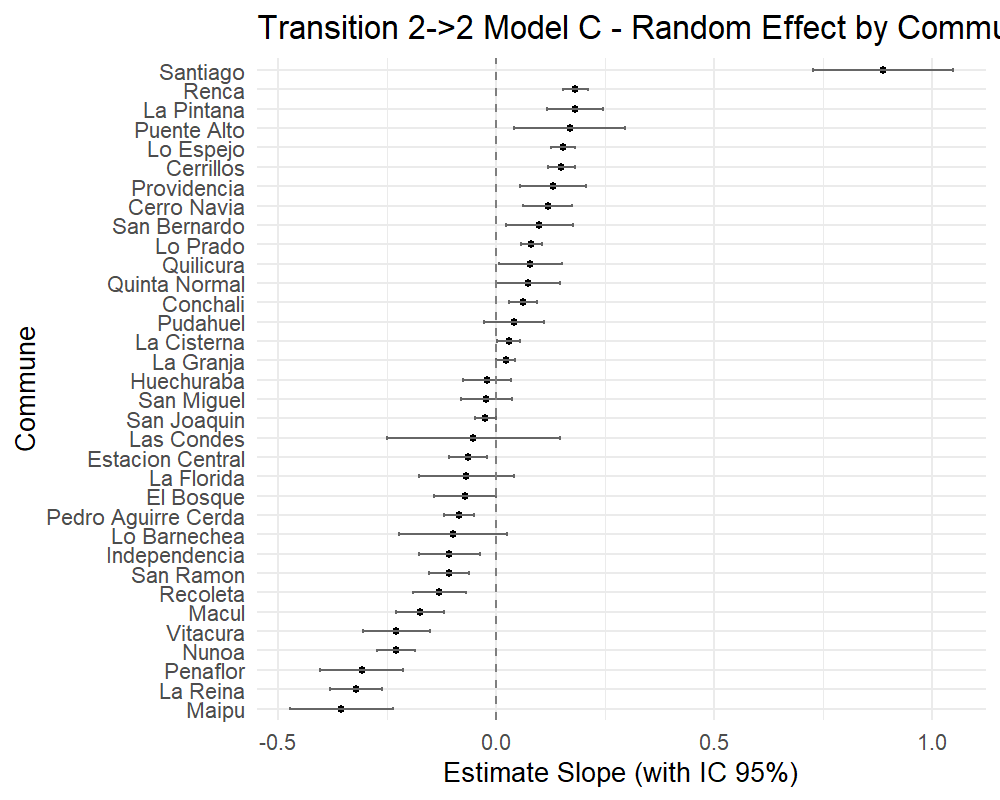

In [281]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_2_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->2 Model C - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_2_modelC_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_2_modelC_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

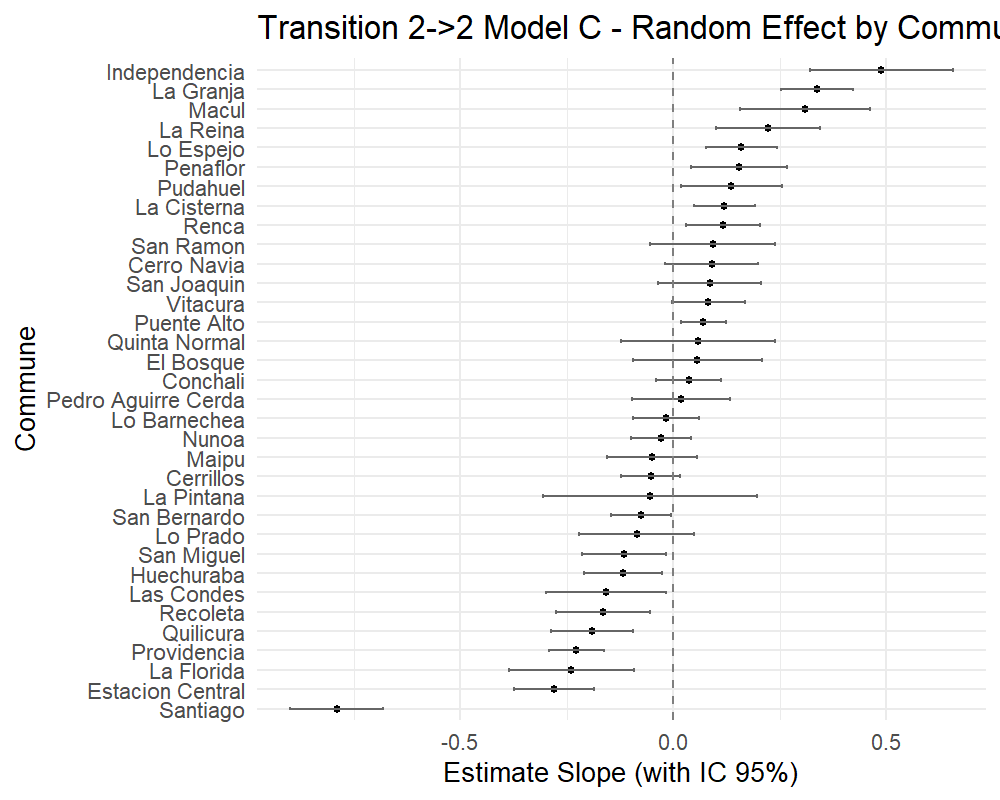

In [282]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_2_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->2 Model C - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_2_modelC_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_2_modelC_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

## **Transition 2->3** (Severe to Critical):

In [283]:
specific_transition_2_3 = 'Trans_2->3'
transition_data_2_3 = lmm_data[lmm_data['Transition'] == specific_transition_2_3]


In [284]:
transition_data_2_3['Commune'] = transition_data_2_3['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_3640\2940721469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_2_3['Commune'] = transition_data_2_3['Commune'].astype('category')


In [285]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_2_3)
r.assign("transition_data_2_3", r_data)

Commune,Original_Day,Correlative_Day,...,Health_and_Ecology,Housing_and_Urban_Space,Urban_Quality_of_Life_Index_2019
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


### **Model A**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index

Formula: 

$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + (\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} \mid \text{Commune})
$$

In [286]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_A_trans_2_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_2_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_A_trans_2_3))
writeLines(summary_text)
''')


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_2_3
Control: control

REML criterion at convergence: -3779.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.4919 -0.6307 -0.1649  0.5433  4.3073 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.24022  0.4901              
          Internal_Mobility_Index 0.02989  0.1729   -0.69      
          External_Mobility_Index 0.01054  0.1027    0.19 -0.70
 Residual                         0.03268  0.1808              
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)             -0.70281    0.08503 32.75468  -8.266  1.6e-09 ***
Internal_Mobility_Index  0.0

#### R2 Marginal and Conditional:

In [287]:

r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_A_trans_2_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')


r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.259255,0.931495


#### Random Effects:

In [288]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_A_trans_2_3, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,0.027682,0.132923,-0.100383,Cerrillos
Cerro Navia,-0.423736,-0.015056,0.019017,Cerro Navia
Conchali,-0.375921,0.129443,-0.016299,Conchali
El Bosque,0.190409,0.023473,-0.050493,El Bosque
Estacion Central,0.236555,-0.046160,-0.050748,Estacion Central


##### Random Effect of Commune - External Mobility Index.

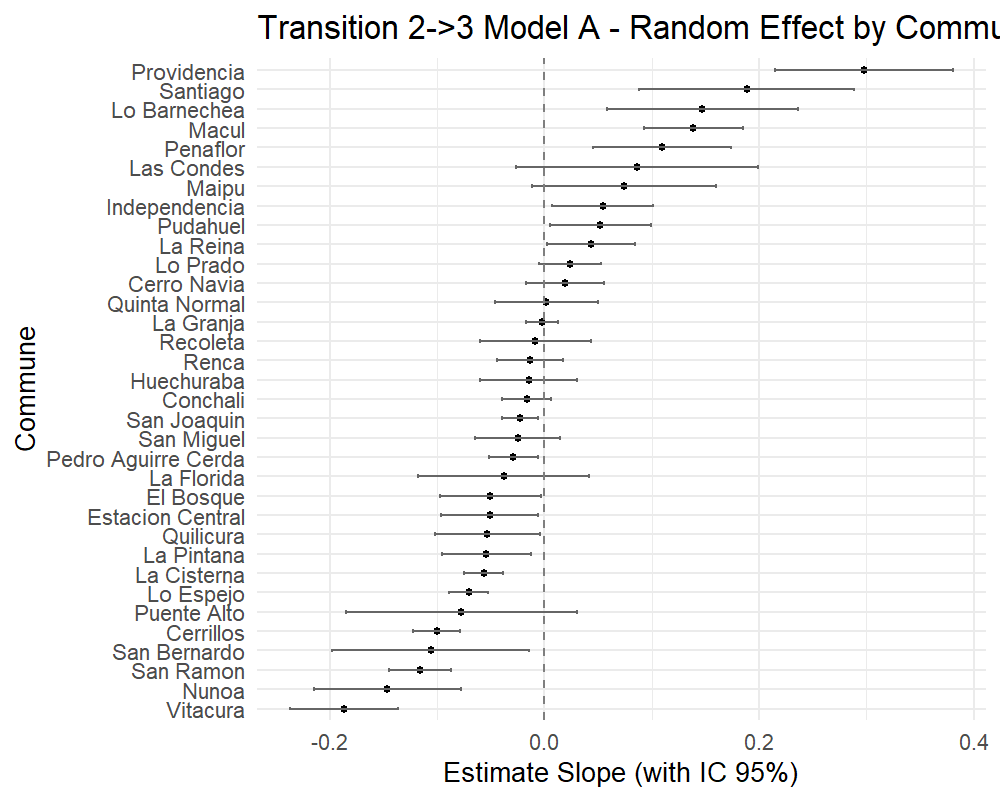

In [289]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_2_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->3 Model A - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_3_modelA_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_3_modelA_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

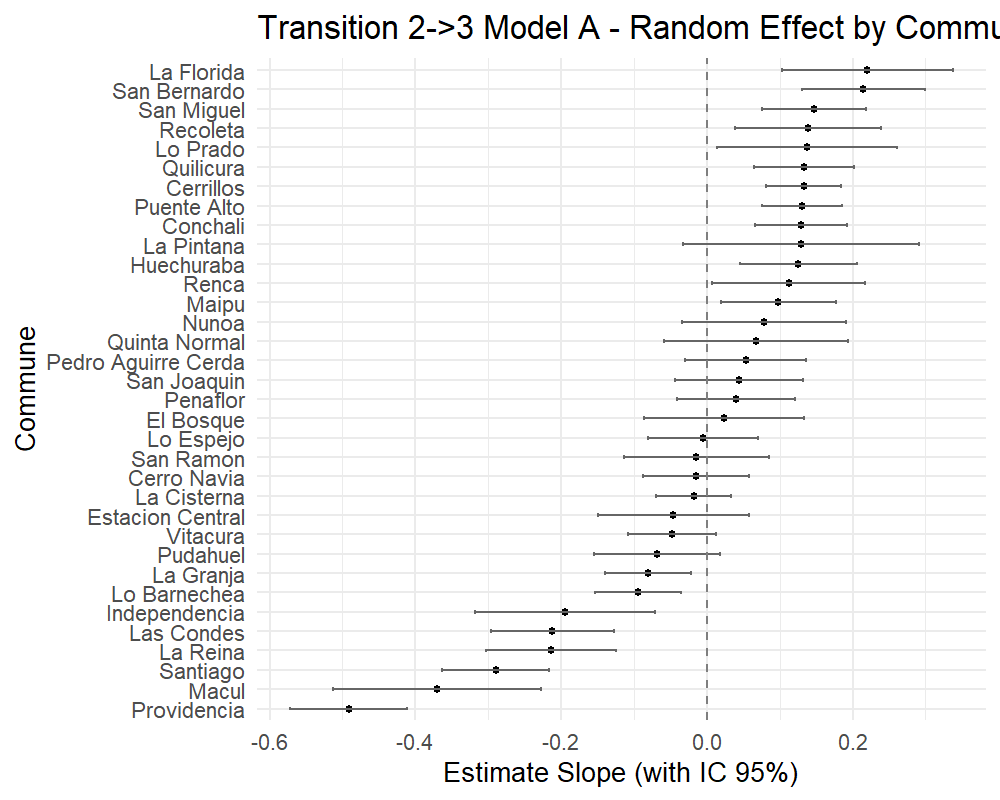

In [290]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_2_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->3 Model A - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_3_modelA_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_3_modelA_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### **Model B**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index
- Sociodemographic Variables Censo 2017.


$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + \text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage} +(\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} +\text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage}\mid \text{Commune})
$$

In [291]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_2_3) <- gsub("-", "_", colnames(transition_data_2_3))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Per_Capita_Income','Total_Households_Housed', 'Housing_Precariousness_Index',
                        'Higher_Education_Percentage')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_2_3[[var]] <- as.numeric(gsub(",", ".", transition_data_2_3[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_2_3[vars_to_scale] <- scale(transition_data_2_3[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_B_trans_2_3 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + 
      (Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune),
      data = transition_data_2_3, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_B_trans_2_3))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_2_3
Control: control

REML criterion at convergence: -3840.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3857 -0.6279 -0.1662  0.5434  4.3537 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.04891  0.2212                    
          Internal_Mobility_Index      0.13300  0.3647    0.86            
          External_Mobility_Index      0.05184  0.2277   -0.25 -0.70      
          Per_Cap

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Model failed to converge with 1 negative eigenvalue: -7.8e-02 



In [292]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_B_trans_2_3)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.440138,0.953181


In [293]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_B_trans_2_3, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Per_Capita_Income,Total_Households_Housed,Housing_Precariousness_Index,Higher_Education_Percentage,Commune
Cerrillos,0.086312,0.291774,-0.223786,0.261575,-0.177421,0.205684,-0.352309,Cerrillos
Cerro Navia,-0.018516,-0.084881,0.074620,-0.288848,0.050342,-0.070297,0.250954,Cerro Navia
Conchali,0.191593,0.261114,-0.035187,0.381863,-0.206587,0.075284,-0.265752,Conchali
El Bosque,-0.103962,-0.017340,-0.129380,-0.369155,0.053380,0.077522,0.126771,El Bosque
Estacion Central,-0.139759,-0.067671,-0.120962,-0.161142,0.090848,0.067237,-0.005868,Estacion Central


##### Random Effect of Commune - External Mobility Index.

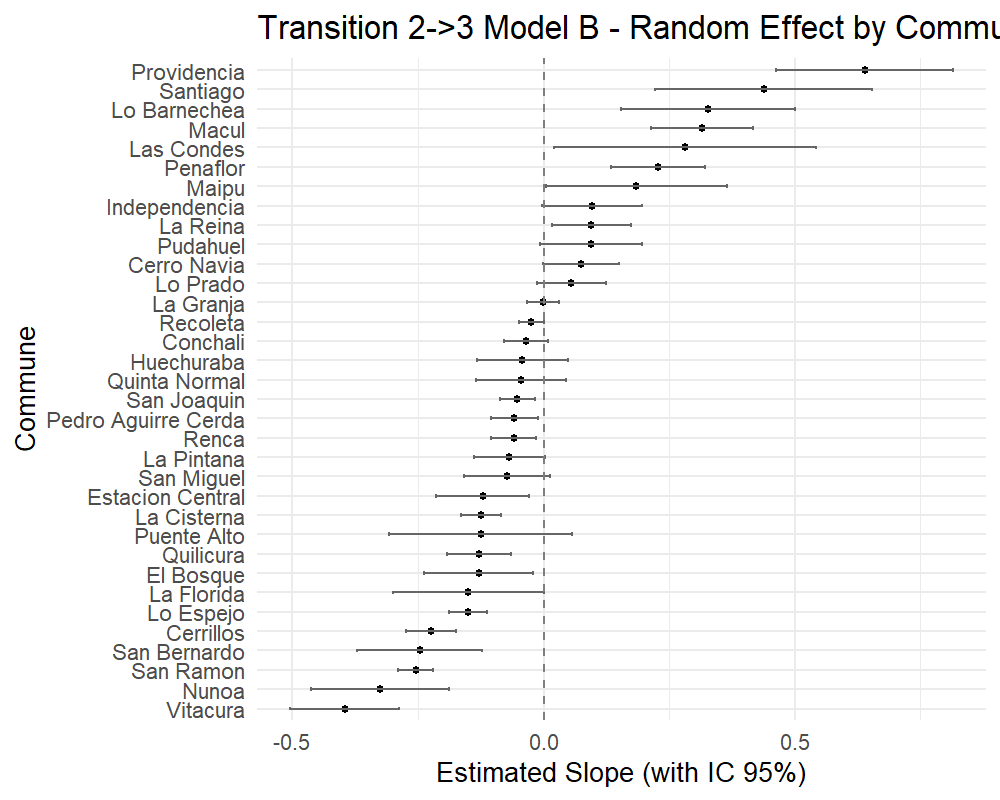

In [294]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_2_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->3 Model B - Random Effect by Commune – External Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_3_modelB_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_3_modelB_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

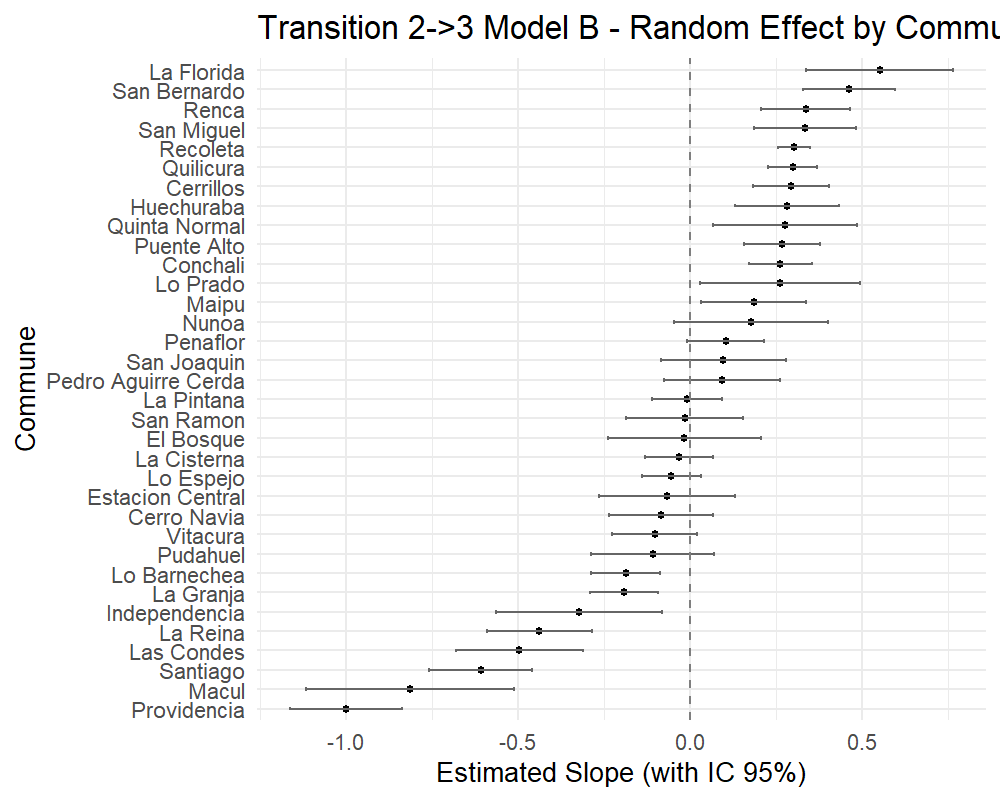

In [295]:
# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_2_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->3 Model B - Random Effect by Commune – Internal Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_3_modelB_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_3_modelB_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### Model C Mobility + 5 dimentions of Urban Quality of Life Index 2019: 
- Internal Mobility Index
- External Mobility Index
- Employment Conditions
- Business Climate
- Socio-cultural Factors
- Connectivity and Mobility
- Health and Ecology
- Housing and Urban Space

In [296]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_2_3) <- gsub("-", "_", colnames(transition_data_2_3))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Employment_Conditions','Business_Climate', 'Socio_cultural_Factors',
                        'Connectivity_and_Mobility', 'Health_and_Ecology',
                        'Housing_and_Urban_Space')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_2_3[[var]] <- as.numeric(gsub(",", ".", transition_data_2_3[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_2_3[vars_to_scale] <- scale(transition_data_2_3[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_C_trans_2_3 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space + 
      (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space | Commune),
      data = transition_data_2_3, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_C_trans_2_3))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Employment_Conditions + Business_Climate + Socio_cultural_Factors +  
    Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space +  
    (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +  
        Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility +  
        Health_and_Ecology + Housing_and_Urban_Space | Commune)
   Data: transition_data_2_3
Control: control

REML criterion at convergence: -3856.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3479 -0.6311 -0.1639  0.5391  4.4148 

Random effects:
 Groups   Name                      Variance Std.Dev. Corr                   
 Commune  (Intercept)               0.017683 0.13298                         
          Internal_Mobility_Index   0.143260 0.37850   0.64                  
  

In [297]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_C_trans_2_3)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.448356,0.896194


#### Random Effects:

In [298]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_C_trans_2_3, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Employment_Conditions,Business_Climate,Socio_cultural_Factors,Connectivity_and_Mobility,Health_and_Ecology,Housing_and_Urban_Space,Commune
Cerrillos,-0.002069,0.306649,-0.242842,-0.010774,-0.024508,0.024406,-0.057646,0.269639,-0.197691,Cerrillos
Cerro Navia,-0.038385,-0.056189,0.041878,0.054201,0.057274,-0.027860,-0.034519,-0.018544,0.013083,Cerro Navia
Conchali,0.111080,0.280569,-0.049235,-0.003837,-0.003969,-0.017355,-0.022445,0.079553,-0.148223,Conchali
El Bosque,-0.034425,0.123015,-0.154272,-0.011302,-0.020970,0.025129,-0.028820,0.160407,-0.087875,El Bosque
Estacion Central,-0.132755,-0.136899,-0.096420,-0.002487,-0.011084,0.036181,-0.010006,0.077497,0.049655,Estacion Central


##### Random Effect of Commune - External Mobility Index.

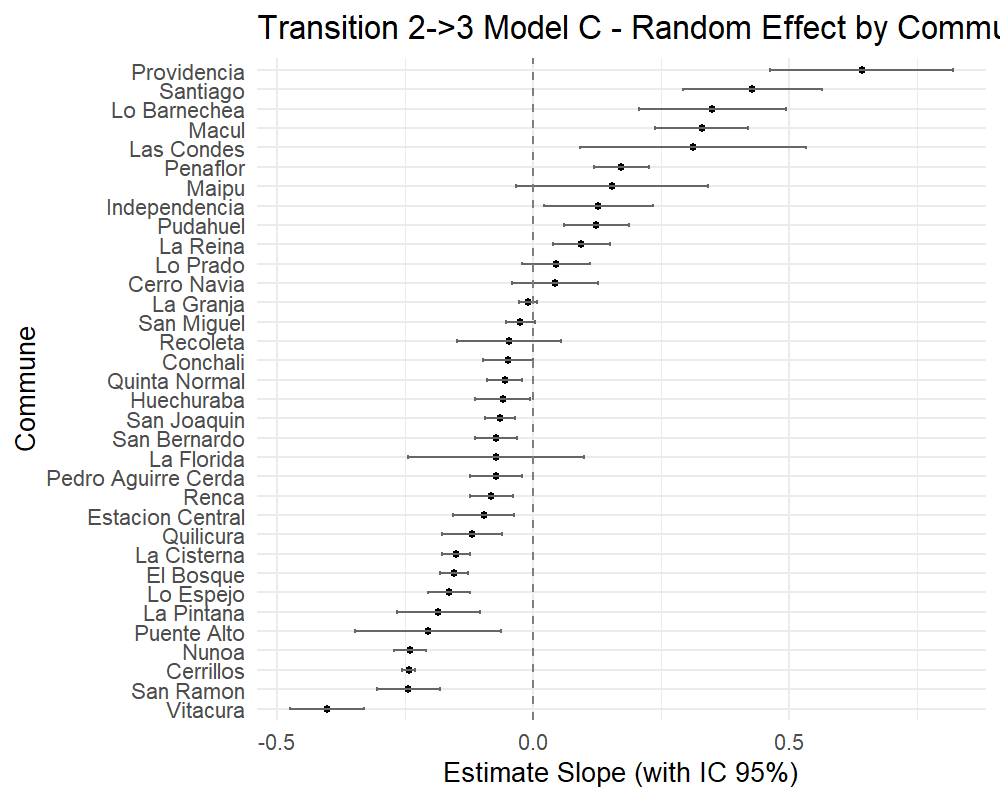

In [299]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_2_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->3 Model C - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_3_modelC_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_3_modelC_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

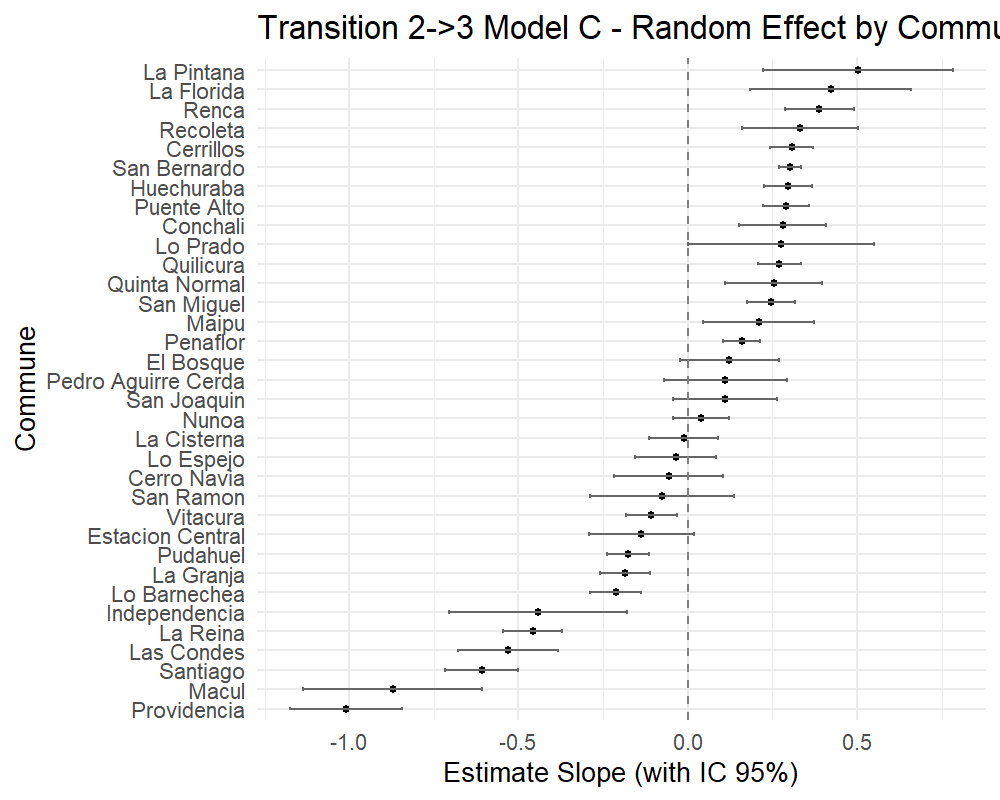

In [300]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_2_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->3 Model C - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_3_modelC_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_3_modelC_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

## **Transition 3->3** (Persistence in Critical State):

In [301]:
specific_transition_3_3 = 'Trans_3->3'
transition_data_3_3 = lmm_data[lmm_data['Transition'] == specific_transition_3_3]


In [302]:
transition_data_3_3['Commune'] = transition_data_3_3['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_3640\3895817056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_3_3['Commune'] = transition_data_3_3['Commune'].astype('category')


In [303]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_3_3)
r.assign("transition_data_3_3", r_data)

Commune,Original_Day,Correlative_Day,...,Health_and_Ecology,Housing_and_Urban_Space,Urban_Quality_of_Life_Index_2019
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


### **Model A**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index

Formula: 

$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + (\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} \mid \text{Commune})
$$

In [304]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_A_trans_3_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_3_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_A_trans_3_3))
writeLines(summary_text)
''')


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_3_3
Control: control

REML criterion at convergence: -7463.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5962 -0.7123  0.1524  0.7844  3.0789 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.087044 0.29503             
          Internal_Mobility_Index 0.015317 0.12376  -0.50      
          External_Mobility_Index 0.006197 0.07872  -0.16 -0.61
 Residual                         0.019726 0.14045             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              1.92858    0.05156 32.60681  37.404  < 2e-16 ***
Internal_Mobility_Index -0.1

#### R2 Marginal and Conditional:

In [305]:

r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_A_trans_3_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')


r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.45791,0.940347


#### Random Effects:

In [306]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_A_trans_3_3, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,-0.251203,-0.081652,0.094100,Cerrillos
Cerro Navia,0.202739,0.068988,-0.026483,Cerro Navia
Conchali,0.188230,-0.080444,0.003817,Conchali
El Bosque,-0.410095,0.027640,0.043256,El Bosque
Estacion Central,0.157304,-0.076538,0.025535,Estacion Central


##### Random Effect of Commune - External Mobility Index.

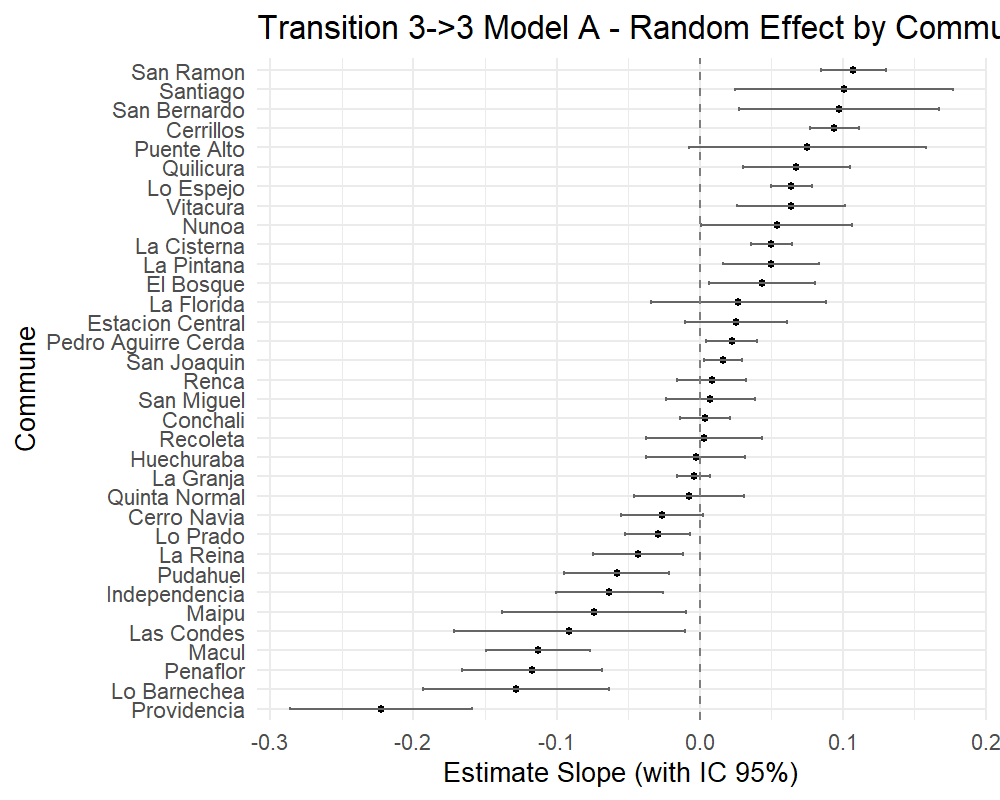

In [307]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_3_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->3 Model A - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_3_modelA_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_3_modelA_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

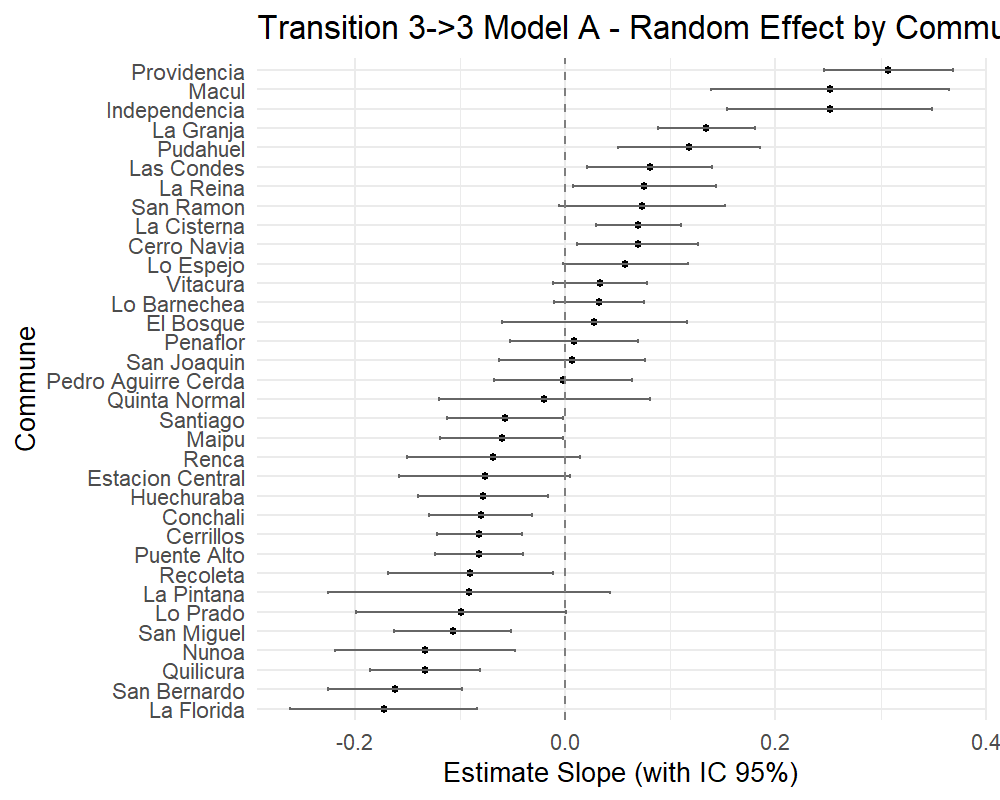

In [308]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_3_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->3 Model A - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_3_modelA_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_3_modelA_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### **Model B**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index
- Sociodemographic Variables Censo 2017.


$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + \text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage} +(\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} +\text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage}\mid \text{Commune})
$$

In [309]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_3_3) <- gsub("-", "_", colnames(transition_data_3_3))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Per_Capita_Income','Total_Households_Housed', 'Housing_Precariousness_Index',
                        'Higher_Education_Percentage')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_3_3[[var]] <- as.numeric(gsub(",", ".", transition_data_3_3[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_3_3[vars_to_scale] <- scale(transition_data_3_3[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_B_trans_3_3 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + 
      (Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune),
      data = transition_data_3_3, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_B_trans_3_3))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_3_3
Control: control

REML criterion at convergence: -7506

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6437 -0.7079  0.1546  0.7872  3.0817 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.03986  0.1997                    
          Internal_Mobility_Index      0.06744  0.2597    0.81            
          External_Mobility_Index      0.03186  0.1785   -0.05 -0.62      
          Per_Capit

In [310]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_B_trans_3_3)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.350248,0.946415


In [311]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_B_trans_3_3, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Per_Capita_Income,Total_Households_Housed,Housing_Precariousness_Index,Higher_Education_Percentage,Commune
Cerrillos,0.010756,-0.175882,0.214718,-0.579970,0.142821,-0.083399,0.705708,Cerrillos
Cerro Navia,0.139989,0.219359,-0.091798,0.362883,-0.109431,0.089313,-0.381319,Cerro Navia
Conchali,-0.127341,-0.129937,0.002704,-0.148147,0.046452,-0.042794,0.112185,Conchali
El Bosque,0.086287,-0.029671,0.150231,0.605362,0.025391,-0.162680,-0.344412,El Bosque
Estacion Central,-0.091330,-0.142582,0.053817,-0.523223,0.082652,-0.013117,0.482641,Estacion Central


##### Random Effect of Commune - External Mobility Index.

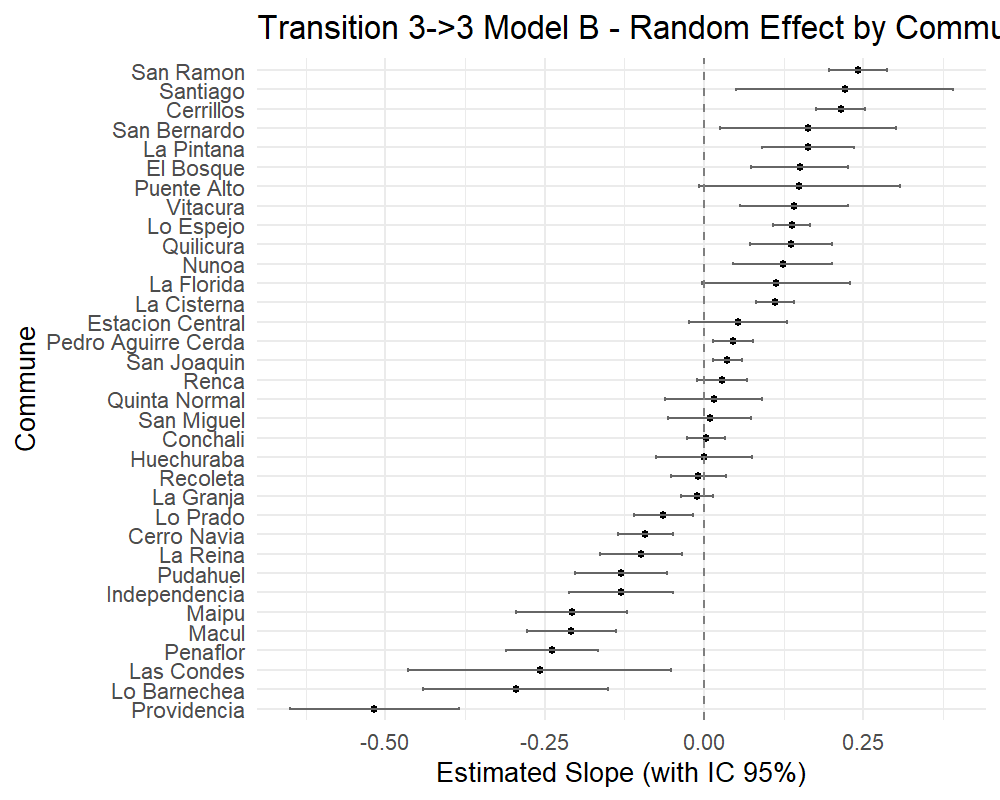

In [312]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_3_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->3 Model B - Random Effect by Commune – External Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_3_modelB_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_3_modelB_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

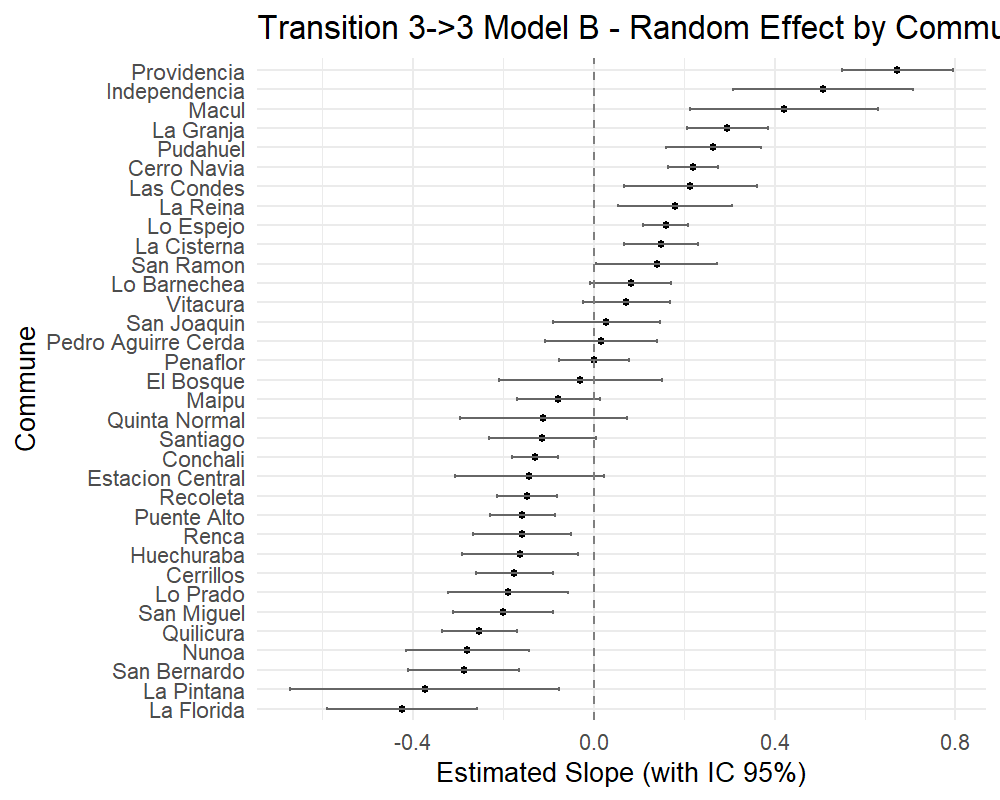

In [313]:
# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_3_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->3 Model B - Random Effect by Commune – Internal Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_3_modelB_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_3_modelB_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### Model C Mobility + 5 dimentions of Urban Quality of Life Index 2019: 
- Internal Mobility Index
- External Mobility Index
- Employment Conditions
- Business Climate
- Socio-cultural Factors
- Connectivity and Mobility
- Health and Ecology
- Housing and Urban Space

In [314]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_3_3) <- gsub("-", "_", colnames(transition_data_3_3))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Employment_Conditions','Business_Climate', 'Socio_cultural_Factors',
                        'Connectivity_and_Mobility', 'Health_and_Ecology',
                        'Housing_and_Urban_Space')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_3_3[[var]] <- as.numeric(gsub(",", ".", transition_data_3_3[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_3_3[vars_to_scale] <- scale(transition_data_3_3[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_C_trans_3_3 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space + 
      (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space | Commune),
      data = transition_data_3_3, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_C_trans_3_3))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Employment_Conditions + Business_Climate + Socio_cultural_Factors +  
    Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space +  
    (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +  
        Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility +  
        Health_and_Ecology + Housing_and_Urban_Space | Commune)
   Data: transition_data_3_3
Control: control

REML criterion at convergence: -7501.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6457 -0.7069  0.1546  0.7851  3.0446 

Random effects:
 Groups   Name                      Variance Std.Dev. Corr                   
 Commune  (Intercept)               0.008698 0.09326                         
          Internal_Mobility_Index   0.068747 0.26220   0.66                  
  

In [315]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_C_trans_3_3)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.589392,0.928201


#### Random Effects:

In [316]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_C_trans_3_3, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Employment_Conditions,Business_Climate,Socio_cultural_Factors,Connectivity_and_Mobility,Health_and_Ecology,Housing_and_Urban_Space,Commune
Cerrillos,0.014907,-0.175662,0.215221,-0.045452,0.040524,0.009378,-0.007638,-0.252827,0.153542,Cerrillos
Cerro Navia,0.087280,0.175111,-0.067320,-0.006515,0.021244,-0.068434,0.005413,0.051271,-0.107807,Cerro Navia
Conchali,-0.067580,-0.170483,0.017447,0.003632,0.044656,0.012809,0.015425,-0.000373,0.051833,Conchali
El Bosque,0.061888,-0.009885,0.134788,-0.036431,0.013128,-0.014047,-0.011733,-0.173911,0.064522,El Bosque
Estacion Central,0.005666,-0.220283,0.094455,-0.037294,0.160380,-0.074389,0.035815,-0.112161,0.056524,Estacion Central


##### Random Effect of Commune - External Mobility Index.

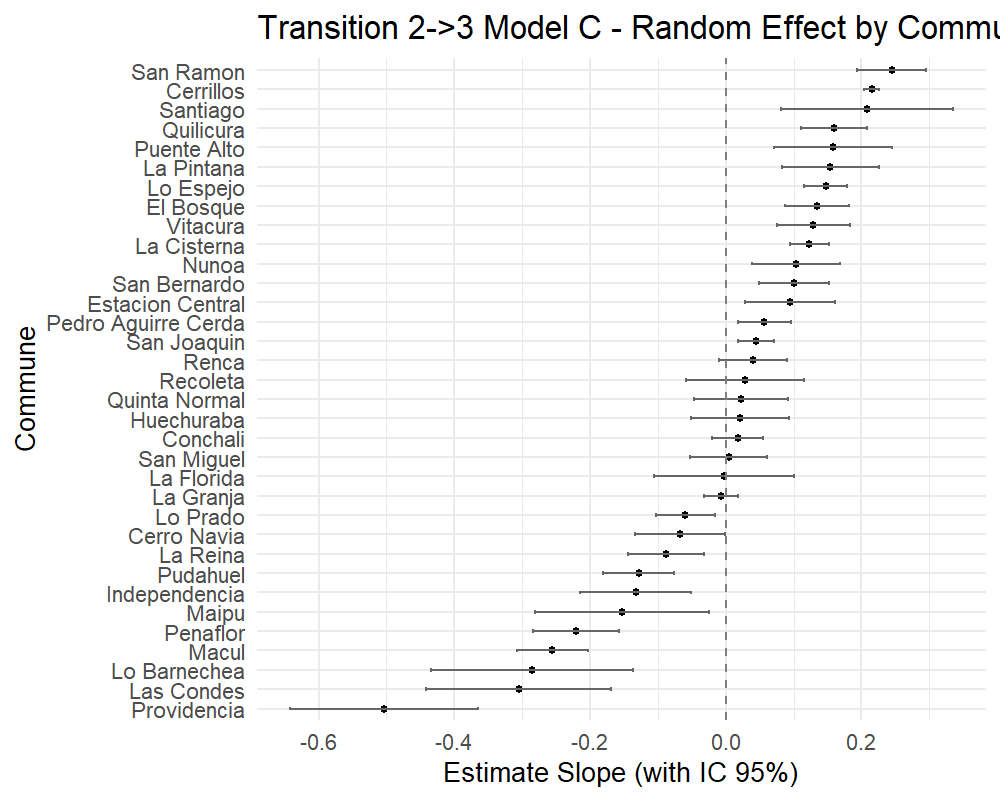

In [317]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_3_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->3 Model C - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_3_modelC_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_3_modelC_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

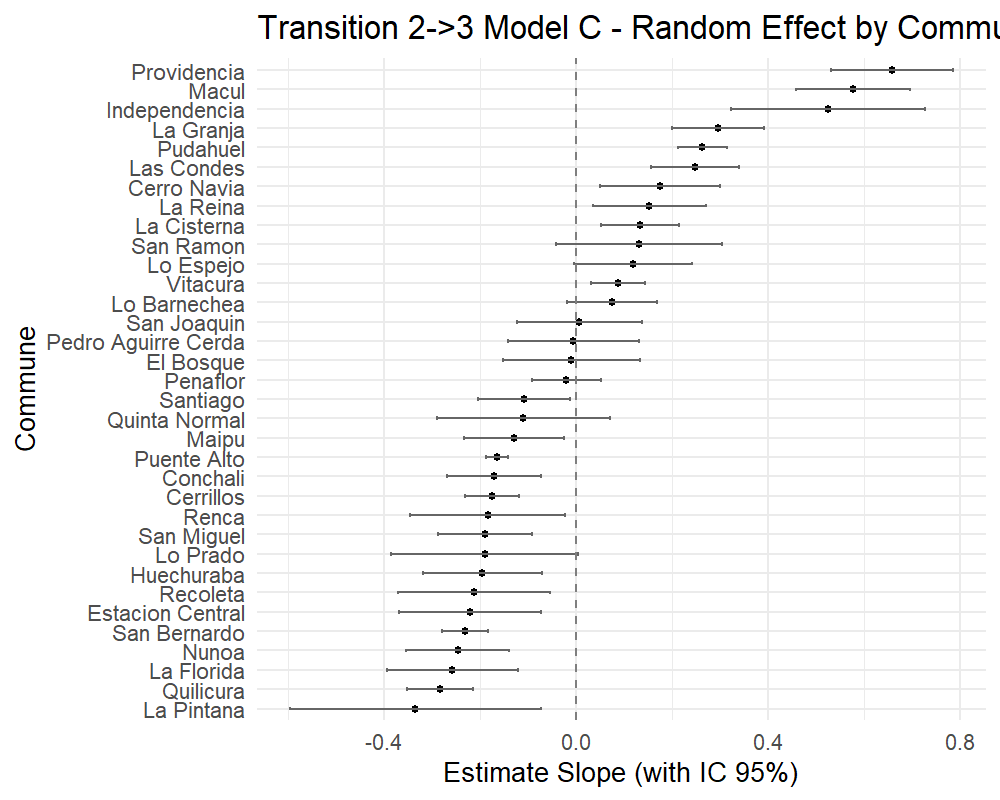

In [318]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_3_3, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->3 Model C - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_3_modelC_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_3_modelC_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

## **Transition 3->2** (Critical to Severe):

In [319]:
specific_transition_3_2 = 'Trans_3->2'
transition_data_3_2 = lmm_data[lmm_data['Transition'] == specific_transition_3_2]


In [320]:
transition_data_3_2['Commune'] = transition_data_3_2['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_3640\954636091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_3_2['Commune'] = transition_data_3_2['Commune'].astype('category')


In [321]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_3_2)
r.assign("transition_data_3_2", r_data)

Commune,Original_Day,Correlative_Day,...,Health_and_Ecology,Housing_and_Urban_Space,Urban_Quality_of_Life_Index_2019
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


### **Model A**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index

Formula: 

$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + (\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} \mid \text{Commune})
$$

In [322]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_A_trans_3_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_3_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_A_trans_3_2))
writeLines(summary_text)
''')


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_3_2
Control: control

REML criterion at convergence: -27720

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2715 -0.5057 -0.2051  0.2551 14.5748 

Random effects:
 Groups   Name                    Variance  Std.Dev. Corr       
 Commune  (Intercept)             0.0059937 0.07742             
          Internal_Mobility_Index 0.0007224 0.02688  -0.61      
          External_Mobility_Index 0.0003140 0.01772   0.00 -0.60
 Residual                         0.0012191 0.03492             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)              0.151410   0.013503 33.118705  11.213 8.14e-13 ***
Internal_Mobility_In

#### R2 Marginal and Conditional:

In [323]:

r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_A_trans_3_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')


r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.237423,0.908003


#### Random Effects:

In [324]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_A_trans_3_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,0.254632,0.004137,-0.025710,Cerrillos
Cerro Navia,-0.056598,0.009711,0.004695,Cerro Navia
Conchali,-0.011755,0.002648,0.001882,Conchali
El Bosque,-0.033198,-0.005196,-0.000478,El Bosque
Estacion Central,-0.054625,0.014236,0.004336,Estacion Central


##### Random Effect of Commune - External Mobility Index.

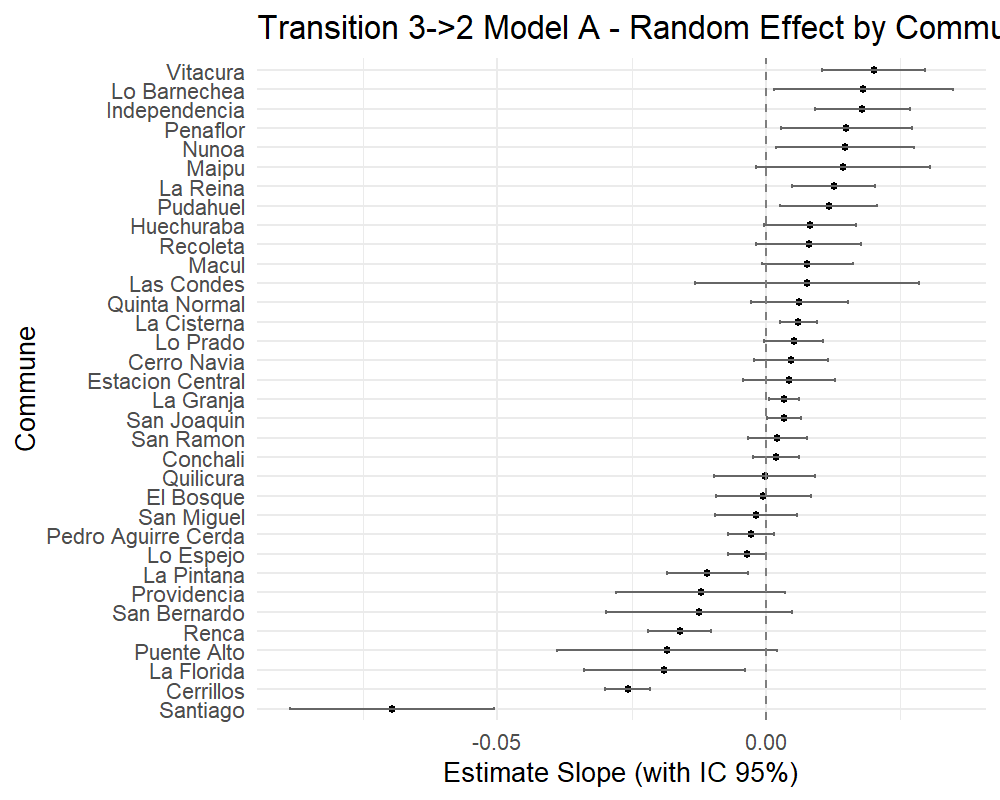

In [325]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_3_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->2 Model A - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_2_modelA_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_2_modelA_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

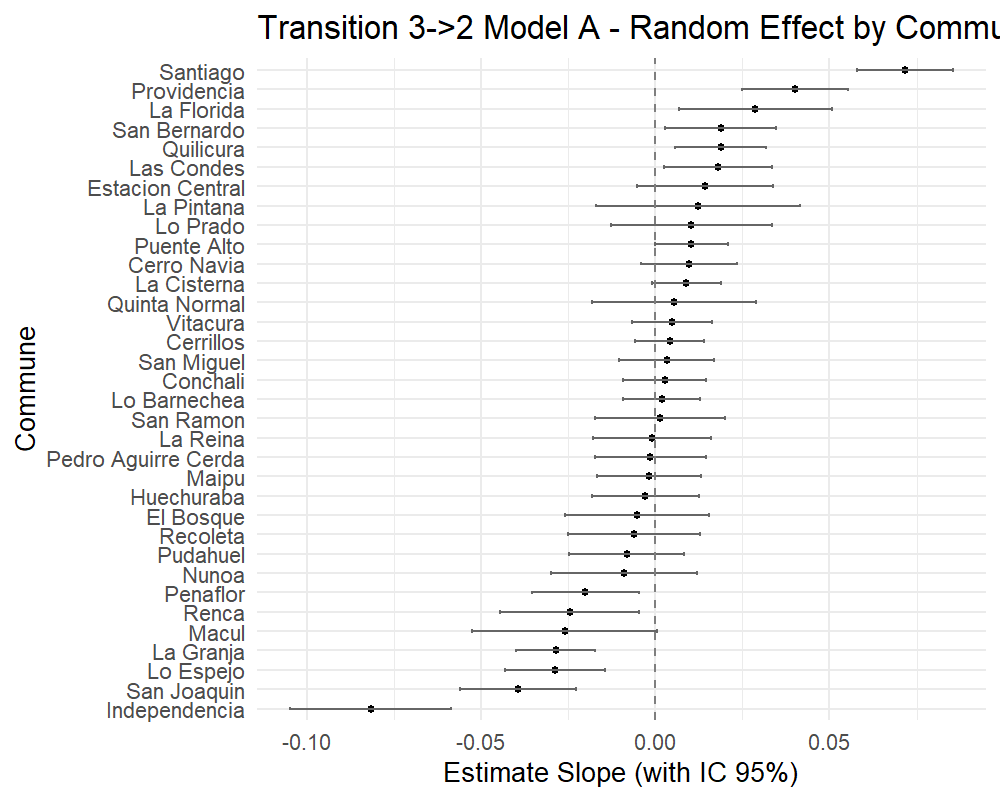

In [326]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_3_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->2 Model A - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_2_modelA_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_2_modelA_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### **Model B**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index
- Sociodemographic Variables Censo 2017.


$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + \text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage} +(\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} +\text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage}\mid \text{Commune})
$$

In [327]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_3_2) <- gsub("-", "_", colnames(transition_data_3_2))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Per_Capita_Income','Total_Households_Housed', 'Housing_Precariousness_Index',
                        'Higher_Education_Percentage')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_3_2[[var]] <- as.numeric(gsub(",", ".", transition_data_3_2[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_3_2[vars_to_scale] <- scale(transition_data_3_2[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_B_trans_3_2 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + 
      (Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune),
      data = transition_data_3_2, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_B_trans_3_2))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_3_2
Control: control

REML criterion at convergence: -27743.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4137 -0.5027 -0.2101  0.2530 14.4092 

Random effects:
 Groups   Name                         Variance  Std.Dev. Corr             
 Commune  (Intercept)                  5.872e-06 0.002423                  
          Internal_Mobility_Index      2.891e-03 0.053764  0.12            
          External_Mobility_Index      1.425e-03 0.037749  0.68 -0.61      
          Pe

In [328]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_B_trans_3_2)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.286112,0.83995


In [329]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_B_trans_3_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Per_Capita_Income,Total_Households_Housed,Housing_Precariousness_Index,Higher_Education_Percentage,Commune
Cerrillos,-0.005089,0.017042,-0.060673,-0.137338,-0.151701,-0.020114,0.032689,Cerrillos
Cerro Navia,0.001696,0.013979,0.013149,0.016948,0.029838,0.004729,-0.004229,Cerro Navia
Conchali,-0.000252,0.005631,0.003535,-0.035658,-0.028814,-0.009764,0.014676,Conchali
El Bosque,-0.001366,0.012485,-0.008004,-0.077865,-0.070942,-0.017352,0.026852,El Bosque
Estacion Central,0.001855,0.029441,0.009265,-0.002200,0.017718,0.003762,0.000160,Estacion Central


##### Random Effect of Commune - External Mobility Index.

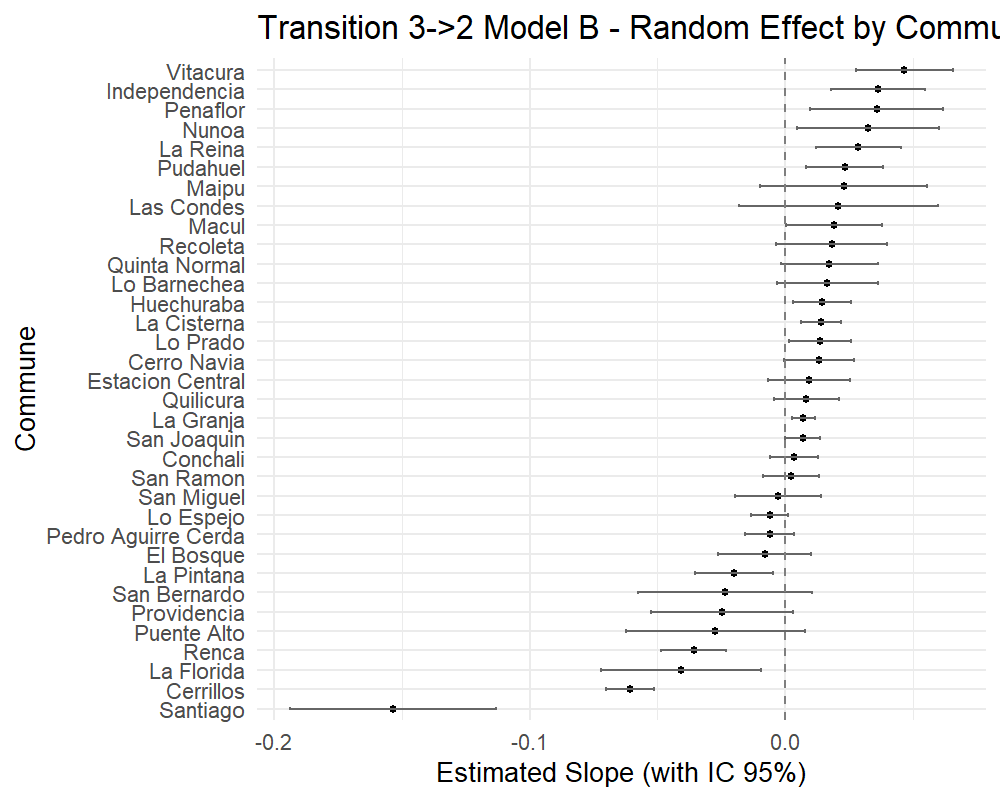

In [330]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_3_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->2 Model B - Random Effect by Commune – External Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_2_modelB_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_2_modelB_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

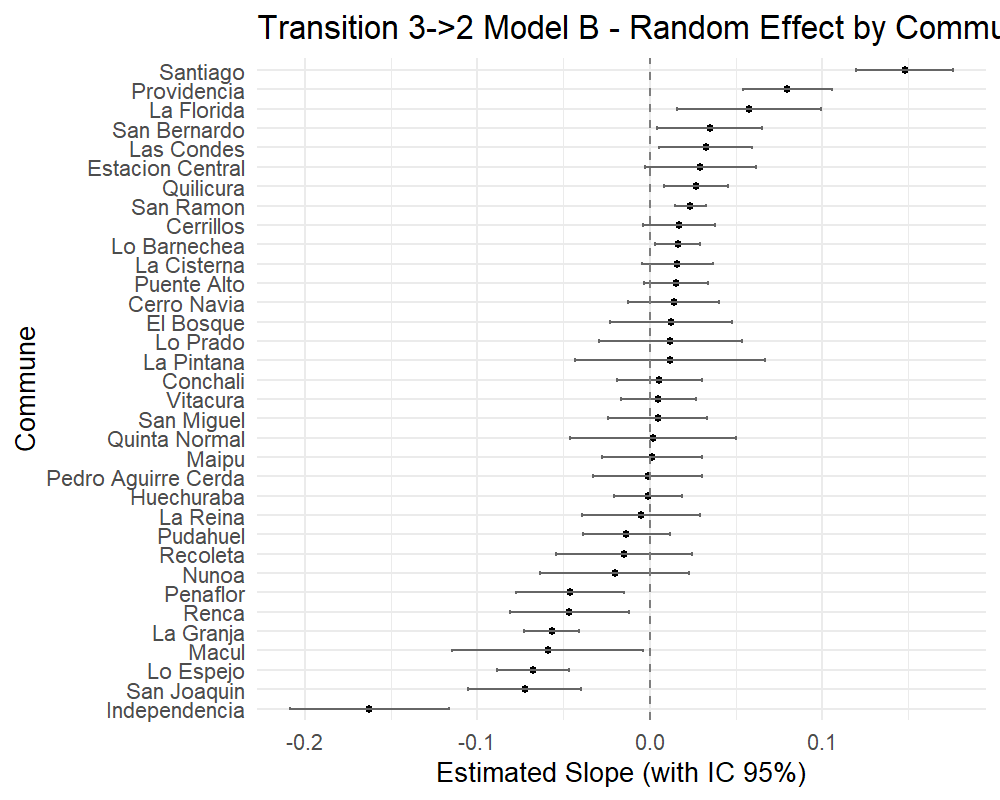

In [331]:
# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_3_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->2 Model B - Random Effect by Commune – Internal Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_2_modelB_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_2_modelB_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### Model C Mobility + 5 dimentions of Urban Quality of Life Index 2019: 
- Internal Mobility Index
- External Mobility Index
- Employment Conditions
- Business Climate
- Socio-cultural Factors
- Connectivity and Mobility
- Health and Ecology
- Housing and Urban Space

In [332]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_3_2) <- gsub("-", "_", colnames(transition_data_3_2))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Employment_Conditions','Business_Climate', 'Socio_cultural_Factors',
                        'Connectivity_and_Mobility', 'Health_and_Ecology',
                        'Housing_and_Urban_Space')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_3_2[[var]] <- as.numeric(gsub(",", ".", transition_data_3_2[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_3_2[vars_to_scale] <- scale(transition_data_3_2[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_C_trans_3_2 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space + 
      (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space | Commune),
      data = transition_data_3_2, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_C_trans_3_2))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Employment_Conditions + Business_Climate + Socio_cultural_Factors +  
    Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space +  
    (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +  
        Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility +  
        Health_and_Ecology + Housing_and_Urban_Space | Commune)
   Data: transition_data_3_2
Control: control

REML criterion at convergence: -27766.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4124 -0.5049 -0.2064  0.2481 14.4176 

Random effects:
 Groups   Name                      Variance  Std.Dev. Corr                   
 Commune  (Intercept)               7.439e-05 0.008625                        
          Internal_Mobility_Index   3.009e-03 0.054858 -0.58                 

In [333]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_C_trans_3_2)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.335611,0.858601


#### Random Effects:

In [334]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_C_trans_3_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Employment_Conditions,Business_Climate,Socio_cultural_Factors,Connectivity_and_Mobility,Health_and_Ecology,Housing_and_Urban_Space,Commune
Cerrillos,-0.006337,0.016410,-6.049247e-02,-0.126136,0.017613,0.104062,-0.022056,-0.004220,-0.025612,Cerrillos
Cerro Navia,0.003238,0.012123,1.455600e-02,0.021400,0.001100,-0.024400,0.011435,0.005997,-0.000147,Cerro Navia
Conchali,-0.000738,0.017600,5.487025e-07,-0.007389,0.005754,-0.003599,0.010678,0.003659,-0.006587,Conchali
El Bosque,-0.005743,0.015530,-8.833346e-03,-0.019997,0.006717,0.005493,0.011222,-0.000817,-0.008129,El Bosque
Estacion Central,0.005751,0.003491,2.079610e-02,0.035879,-0.002931,-0.031137,0.007121,0.006067,0.004899,Estacion Central


##### Random Effect of Commune - External Mobility Index.

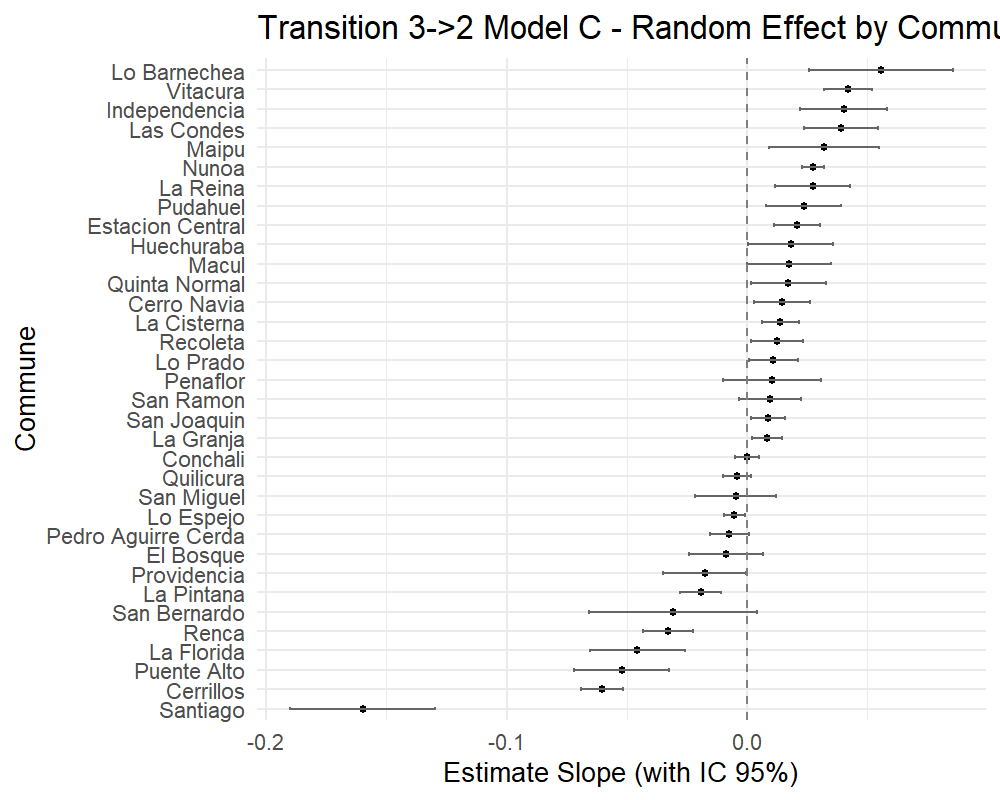

In [335]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_3_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->2 Model C - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_2_modelC_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_2_modelC_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

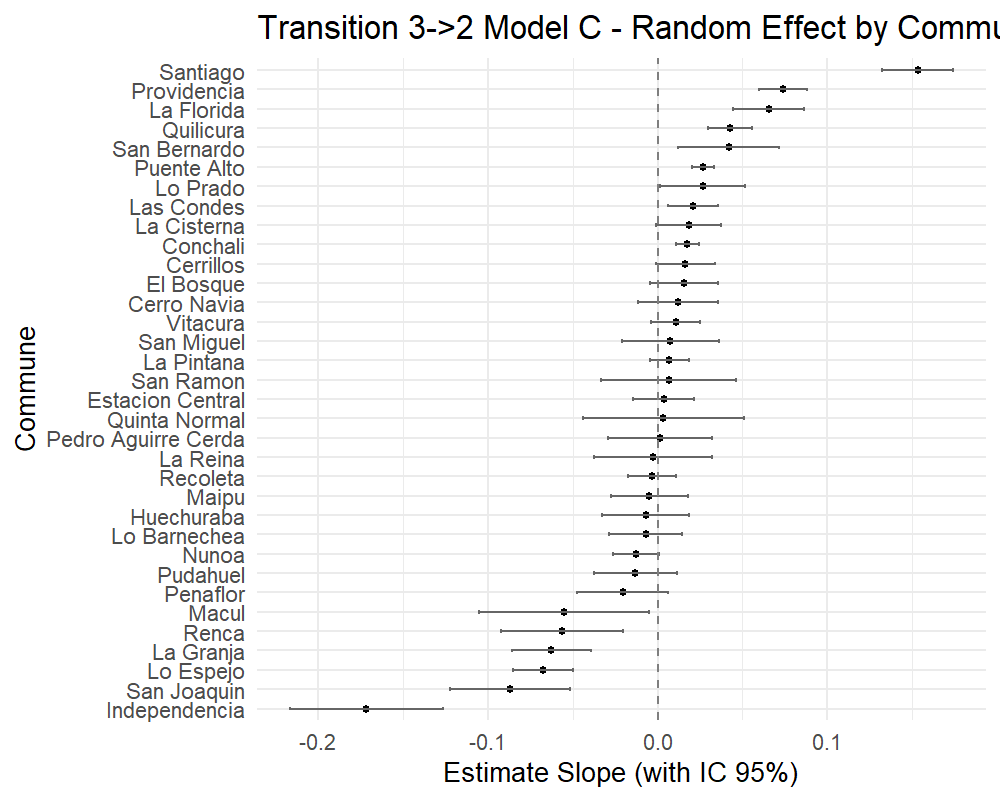

In [336]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_3_2, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 3->2 Model C - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_3_2_modelC_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_3_2_modelC_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

## **Transition 2->1** (Severe to Moderate):

In [337]:
specific_transition_2_1 = 'Trans_2->1'
transition_data_2_1 = lmm_data[lmm_data['Transition'] == specific_transition_2_1]


In [338]:
transition_data_2_1['Commune'] = transition_data_2_1['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_3640\3538543191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_2_1['Commune'] = transition_data_2_1['Commune'].astype('category')


In [339]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_2_1)
r.assign("transition_data_2_1", r_data)

Commune,Original_Day,Correlative_Day,...,Health_and_Ecology,Housing_and_Urban_Space,Urban_Quality_of_Life_Index_2019
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


### **Model A**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index

Formula: 

$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + (\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} \mid \text{Commune})
$$

In [340]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_A_trans_2_1 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_2_1, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_A_trans_2_1))
writeLines(summary_text)
''')


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_2_1
Control: control

REML criterion at convergence: -43064.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7568 -0.3941 -0.0956  0.1604 15.2678 

Random effects:
 Groups   Name                    Variance  Std.Dev. Corr       
 Commune  (Intercept)             0.0027110 0.05207             
          Internal_Mobility_Index 0.0005078 0.02253  -0.55      
          External_Mobility_Index 0.0001895 0.01377   0.45 -0.76
 Residual                         0.0001448 0.01203             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)              0.079747   0.008973 32.871739   8.888 2.95e-10 ***
Internal_Mobility_

#### R2 Marginal and Conditional:

In [341]:

r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_A_trans_2_1)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')


r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.326975,0.987545


#### Random Effects:

In [342]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_A_trans_2_1, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,-0.068258,0.005845,0.001273,Cerrillos
Cerro Navia,-0.045643,0.006438,-0.001001,Cerro Navia
Conchali,-0.001524,-0.000699,0.000391,Conchali
El Bosque,-0.027525,-0.010452,0.002199,El Bosque
Estacion Central,-0.004640,0.000331,0.001387,Estacion Central


##### Random Effect of Commune - External Mobility Index.

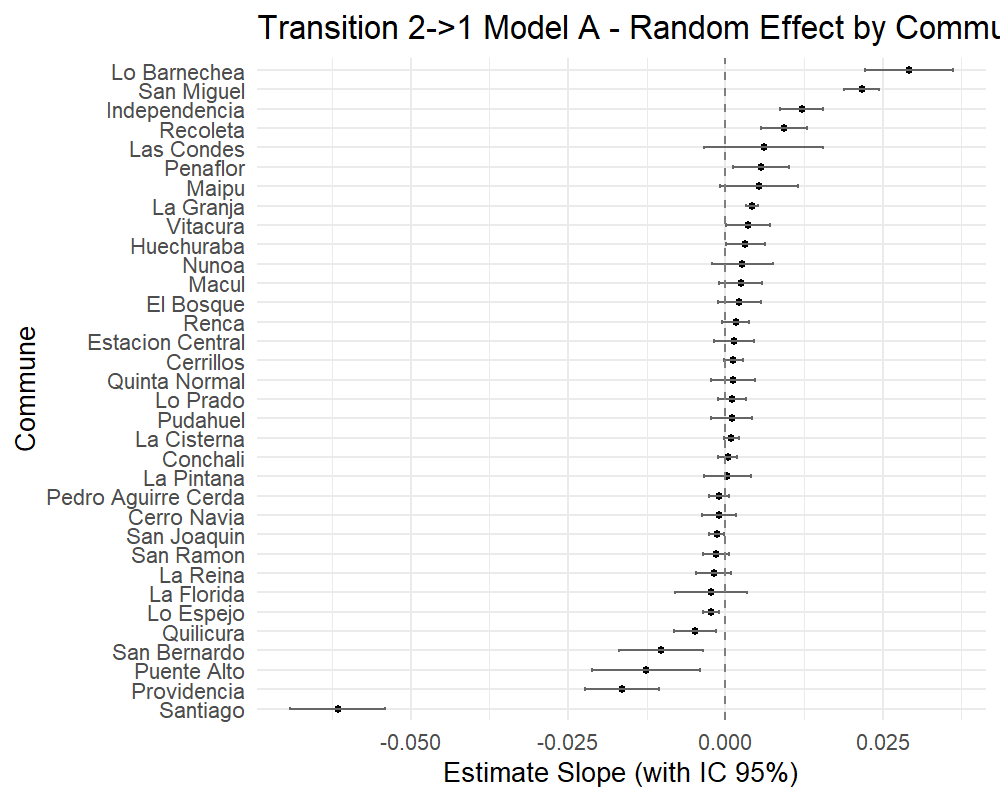

In [343]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_2_1, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->1 Model A - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_1_modelA_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_1_modelA_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

In [ ]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_A_trans_2_1, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->1 Model A - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_1_modelA_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_1_modelA_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### **Model B**: 

Covariates: 
- Internal Mobility Index
- External Mobility Index
- Sociodemographic Variables Censo 2017.


$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + \text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage} +(\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} +\text{Per\_Capita\_Income}+ \text {Total\_Households\_Housed} +  \text {Housing\_Precariousness\_Index} + \text {Higher\_Education\_Percentage}\mid \text{Commune})
$$

In [ ]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_2_1) <- gsub("-", "_", colnames(transition_data_2_1))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Per_Capita_Income','Total_Households_Housed', 'Housing_Precariousness_Index',
                        'Higher_Education_Percentage')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_2_1[[var]] <- as.numeric(gsub(",", ".", transition_data_2_1[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_2_1[vars_to_scale] <- scale(transition_data_2_1[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_B_trans_2_1 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + 
      (Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +
      Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune),
      data = transition_data_2_1, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_B_trans_2_1))
    writeLines(summary_text)
    ''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_3_2
Control: control

REML criterion at convergence: -27743.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4137 -0.5027 -0.2101  0.2530 14.4092 

Random effects:
 Groups   Name                         Variance  Std.Dev. Corr             
 Commune  (Intercept)                  5.872e-06 0.002423                  
          Internal_Mobility_Index      2.891e-03 0.053764  0.12            
          External_Mobility_Index      1.425e-03 0.037749  0.68 -0.61      
          Pe

In [ ]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_B_trans_2_1)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.286112,0.83995


In [ ]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_B_trans_2_1, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Per_Capita_Income,Total_Households_Housed,Housing_Precariousness_Index,Higher_Education_Percentage,Commune
Cerrillos,-0.005089,0.017042,-0.060673,-0.137338,-0.151701,-0.020114,0.032689,Cerrillos
Cerro Navia,0.001696,0.013979,0.013149,0.016948,0.029838,0.004729,-0.004229,Cerro Navia
Conchali,-0.000252,0.005631,0.003535,-0.035658,-0.028814,-0.009764,0.014676,Conchali
El Bosque,-0.001366,0.012485,-0.008004,-0.077865,-0.070942,-0.017352,0.026852,El Bosque
Estacion Central,0.001855,0.029441,0.009265,-0.002200,0.017718,0.003762,0.000160,Estacion Central


##### Random Effect of Commune - External Mobility Index.

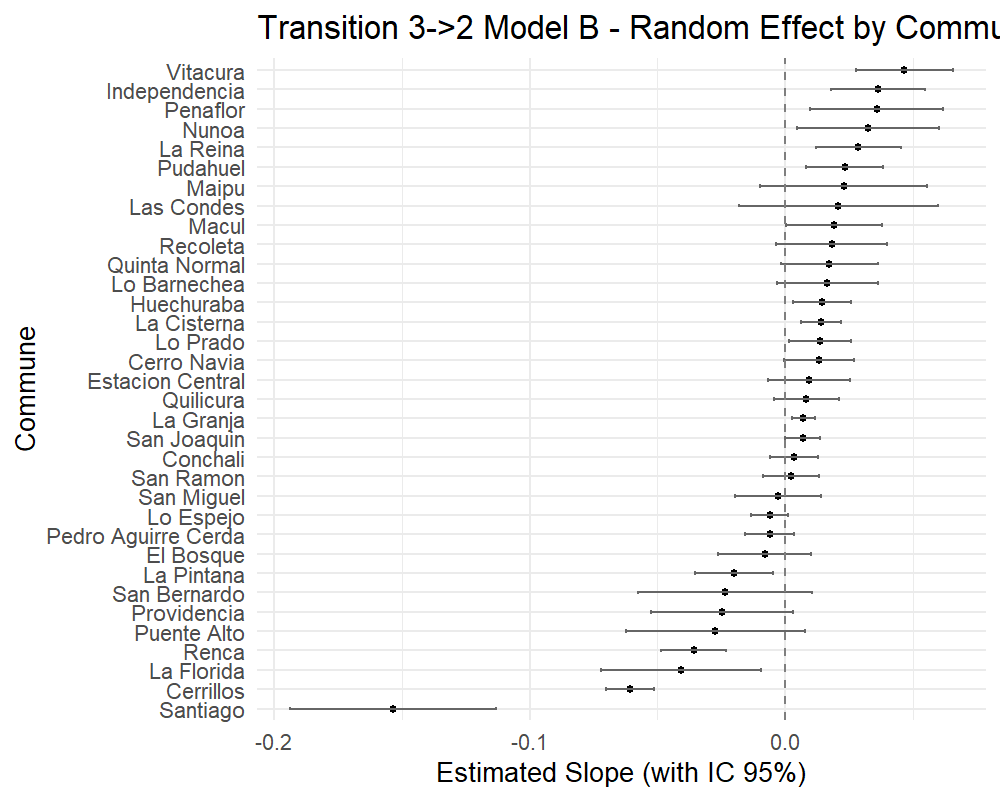

In [ ]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_2_1, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->1 Model B - Random Effect by Commune – External Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_1_modelB_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_1_modelB_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

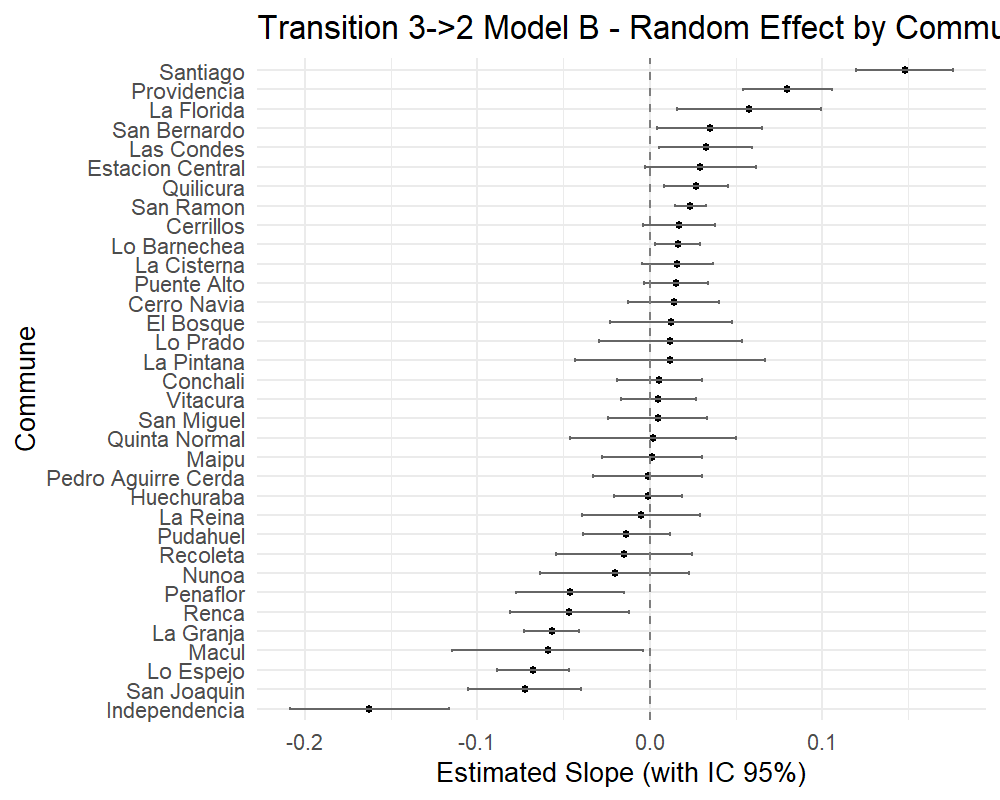

In [ ]:
# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_B_trans_2_1, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->1 Model B - Random Effect by Commune – Internal Mobility Index",
    y = "Estimated Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_1_modelB_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_1_modelB_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

### Model C Mobility + 5 dimentions of Urban Quality of Life Index 2019: 
- Internal Mobility Index
- External Mobility Index
- Employment Conditions
- Business Climate
- Socio-cultural Factors
- Connectivity and Mobility
- Health and Ecology
- Housing and Urban Space

In [ ]:
r('''
  # Instalar y cargar lmerTest si es necesario
    if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
    library(lmerTest)

    # Renombrar la columna para evitar problemas con el guion "-"
    colnames(transition_data_2_1) <- gsub("-", "_", colnames(transition_data_2_1))

    # Lista de columnas a transformar
    vars_to_scale <- c("Internal_Mobility_Index", "External_Mobility_Index", 
                       'Employment_Conditions','Business_Climate', 'Socio_cultural_Factors',
                        'Connectivity_and_Mobility', 'Health_and_Ecology',
                        'Housing_and_Urban_Space')

    # Asegurar que las columnas sean numéricas reemplazando comas por puntos
    for (var in vars_to_scale) {
      transition_data_2_1[[var]] <- as.numeric(gsub(",", ".", transition_data_2_1[[var]]))
    }

    # Escalar las variables después de la conversión
    transition_data_2_1[vars_to_scale] <- scale(transition_data_2_1[vars_to_scale])

    # Cargar lme4 para el modelo
    library(lme4)

    # Configurar el control del optimizador
    control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))

    # Ajustar el modelo
    model_C_trans_2_1 <- lmer(
      Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space + 
      (Internal_Mobility_Index + External_Mobility_Index + Employment_Conditions +
      Business_Climate + Socio_cultural_Factors + Connectivity_and_Mobility + Health_and_Ecology + Housing_and_Urban_Space | Commune),
      data = transition_data_2_1, control = control
    )

    # Capturar y mostrar el resumen del modelo
    summary_text <- capture.output(summary(model_C_trans_2_1))
    writeLines(summary_text)
    ''')

In [ ]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
# Instalar y cargar MuMIn si es necesario
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_C_trans_2_1)

# Verificar si el cálculo fue exitoso antes de convertirlo
if (length(r2_values) == 2 && !any(is.na(r2_values))) {
    r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
} else {
    r2_df <- data.frame(R2_marginal = NA, R2_conditional = NA)
}
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

,R2_marginal,R2_conditional
1,0.589392,0.928201


#### Random Effects:

In [ ]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_C_trans_2_1, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Employment_Conditions,Business_Climate,Socio_cultural_Factors,Connectivity_and_Mobility,Health_and_Ecology,Housing_and_Urban_Space,Commune
Cerrillos,0.014907,-0.175662,0.215221,-0.045452,0.040524,0.009378,-0.007638,-0.252827,0.153542,Cerrillos
Cerro Navia,0.087280,0.175111,-0.067320,-0.006515,0.021244,-0.068434,0.005413,0.051271,-0.107807,Cerro Navia
Conchali,-0.067580,-0.170483,0.017447,0.003632,0.044656,0.012809,0.015425,-0.000373,0.051833,Conchali
El Bosque,0.061888,-0.009885,0.134788,-0.036431,0.013128,-0.014047,-0.011733,-0.173911,0.064522,El Bosque
Estacion Central,0.005666,-0.220283,0.094455,-0.037294,0.160380,-0.074389,0.035815,-0.112161,0.056524,Estacion Central


##### Random Effect of Commune - External Mobility Index.

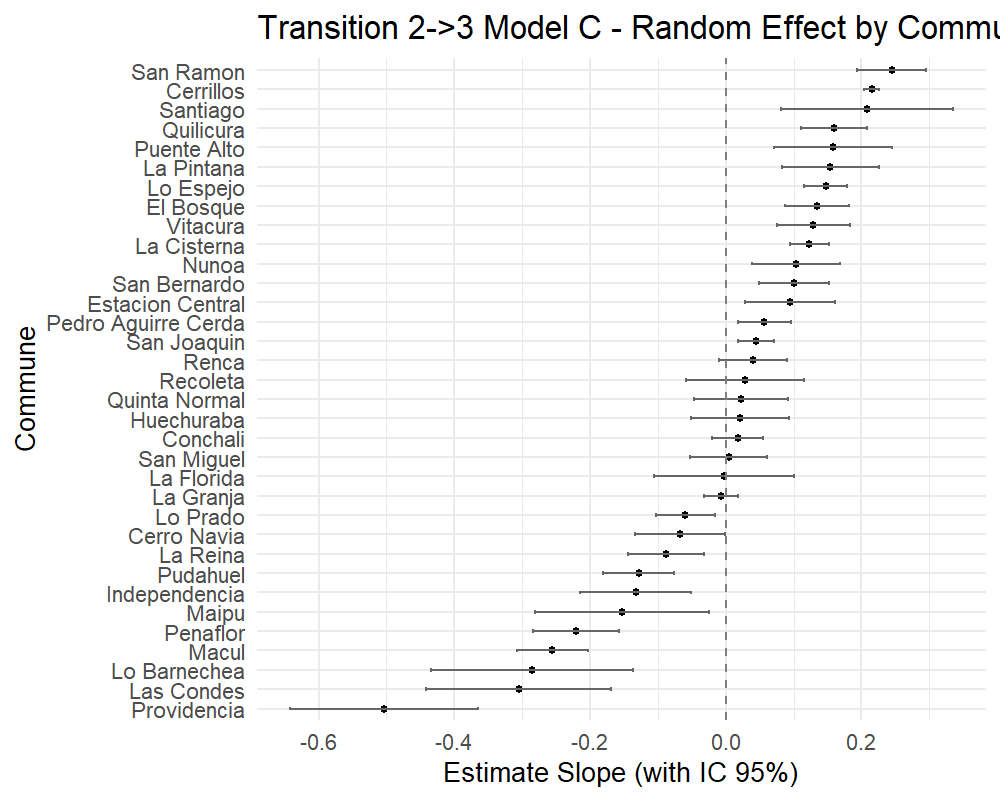

In [ ]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_2_1, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad externa
se <- attr(ranef_list$Commune, "postVar")
external_index_row <- which(colnames(ranef_df) == "External_Mobility_Index")
ranef_df$lower <- ranef_df$External_Mobility_Index - 1.96 * sqrt(se[external_index_row, external_index_row, ])
ranef_df$upper <- ranef_df$External_Mobility_Index + 1.96 * sqrt(se[external_index_row, external_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->1 Model C - Random Effect by Commune – External Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_1_modelC_external_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_1_modelC_external_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")

##### Random Effect of Commune - Internal Mobility Index.

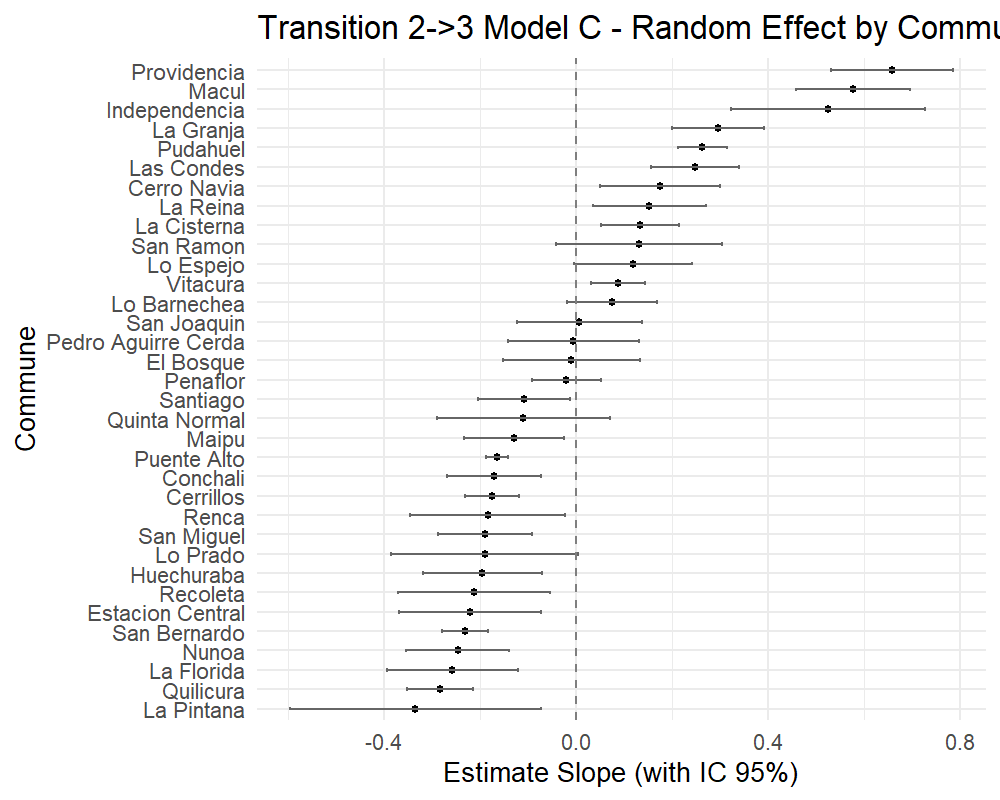

In [ ]:
from rpy2.robjects import r
from IPython.display import Image, display
import os

# Ejecutar todo desde R
r('''
# 1. Extraer efectos aleatorios con varianza condicional
ranef_list <- ranef(model_C_trans_2_1, condVar = TRUE)
ranef_df <- as.data.frame(ranef_list$Commune)
ranef_df$Commune <- rownames(ranef_list$Commune)

# 2. Calcular IC 95% para la pendiente de movilidad interna
se <- attr(ranef_list$Commune, "postVar")
internal_index_row <- which(colnames(ranef_df) == "Internal_Mobility_Index")
ranef_df$lower <- ranef_df$Internal_Mobility_Index - 1.96 * sqrt(se[internal_index_row, internal_index_row, ])
ranef_df$upper <- ranef_df$Internal_Mobility_Index + 1.96 * sqrt(se[internal_index_row, internal_index_row, ])

# 3. Ordenar por efecto estimado
ranef_df <- ranef_df[order(ranef_df$Internal_Mobility_Index), ]
ranef_df$Commune <- factor(ranef_df$Commune, levels = ranef_df$Commune)

# 4. Crear y guardar gráfico
library(ggplot2)
p <- ggplot(ranef_df, aes(x = Commune, y = Internal_Mobility_Index)) +
  geom_point(size = 1.5) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "gray40") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(
    title = "Transition 2->1 Model C - Random Effect by Commune – Internal Mobility Index",
    y = "Estimate Slope (with IC 95%)",
    x = "Commune"
  ) +
  theme_minimal(base_size = 13)

# Ruta de guardado
png("../results/figures/random_effect/random_effect_tran_2_1_modelC_internal_mobility_index.png", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

# Mostrar imagen desde Python
img_path = "../results/figures/random_effect/random_effect_tran_2_1_modelC_internal_mobility_index.png"
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print(f"❌ Imagen no encontrada en: {img_path}")